In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn as sk
from sklearn.model_selection import train_test_split


path = "toxicity_tAPP"
#read train and val
train = pd.read_csv(os.path.join(path, "toxicity_train.csv"))
val = pd.read_csv(os.path.join(path, "toxicity_validation.csv"))

train.describe()

,TPSA,SAacc,H050,MLOGP,RDCHI,GATS1p,nN,C040,LC50
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,47.785224,57.819668,0.943946,2.342321,2.491735,1.054372,1.000000,0.345291,4.638691
std,45.914618,66.756125,1.538713,1.765521,0.811825,0.406260,1.382068,0.819461,1.674167
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000
25%,13.140000,11.000000,0.000000,1.170000,1.975000,0.753000,0.000000,0.000000,3.578000
50%,38.800000,42.683000,0.000000,2.274500,2.366000,1.017000,1.000000,0.000000,4.516000
75%,67.955000,78.121750,1.000000,3.477750,2.930000,1.283000,2.000000,0.000000,5.635000
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,9.945000


In [3]:
train.info()
target = train["LC50"]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TPSA    446 non-null    float64
 1   SAacc   446 non-null    float64
 2   H050    446 non-null    int64  
 3   MLOGP   446 non-null    float64
 4   RDCHI   446 non-null    float64
 5   GATS1p  446 non-null    float64
 6   nN      446 non-null    int64  
 7   C040    446 non-null    int64  
 8   LC50    446 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 31.5 KB


In [4]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TPSA    100 non-null    float64
 1   SAacc   100 non-null    float64
 2   H050    100 non-null    int64  
 3   MLOGP   100 non-null    float64
 4   RDCHI   100 non-null    float64
 5   GATS1p  100 non-null    float64
 6   nN      100 non-null    int64  
 7   C040    100 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 6.4 KB


<Figure size 1000x600 with 0 Axes>

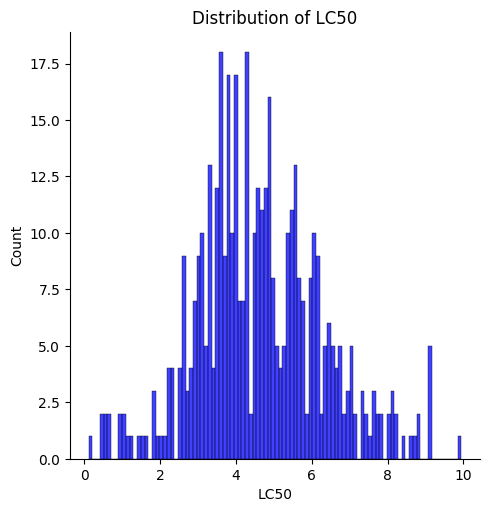

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
#rss 
def rss(y, y_pred):
    return np.sum(np.square(y - y_pred))


# plot the distributions of the variables wrt target variable LC50
plt.figure(figsize=(10, 6))
sns.displot(train["LC50"], color="b", bins=100)
plt.title("Distribution of LC50")
plt.show()




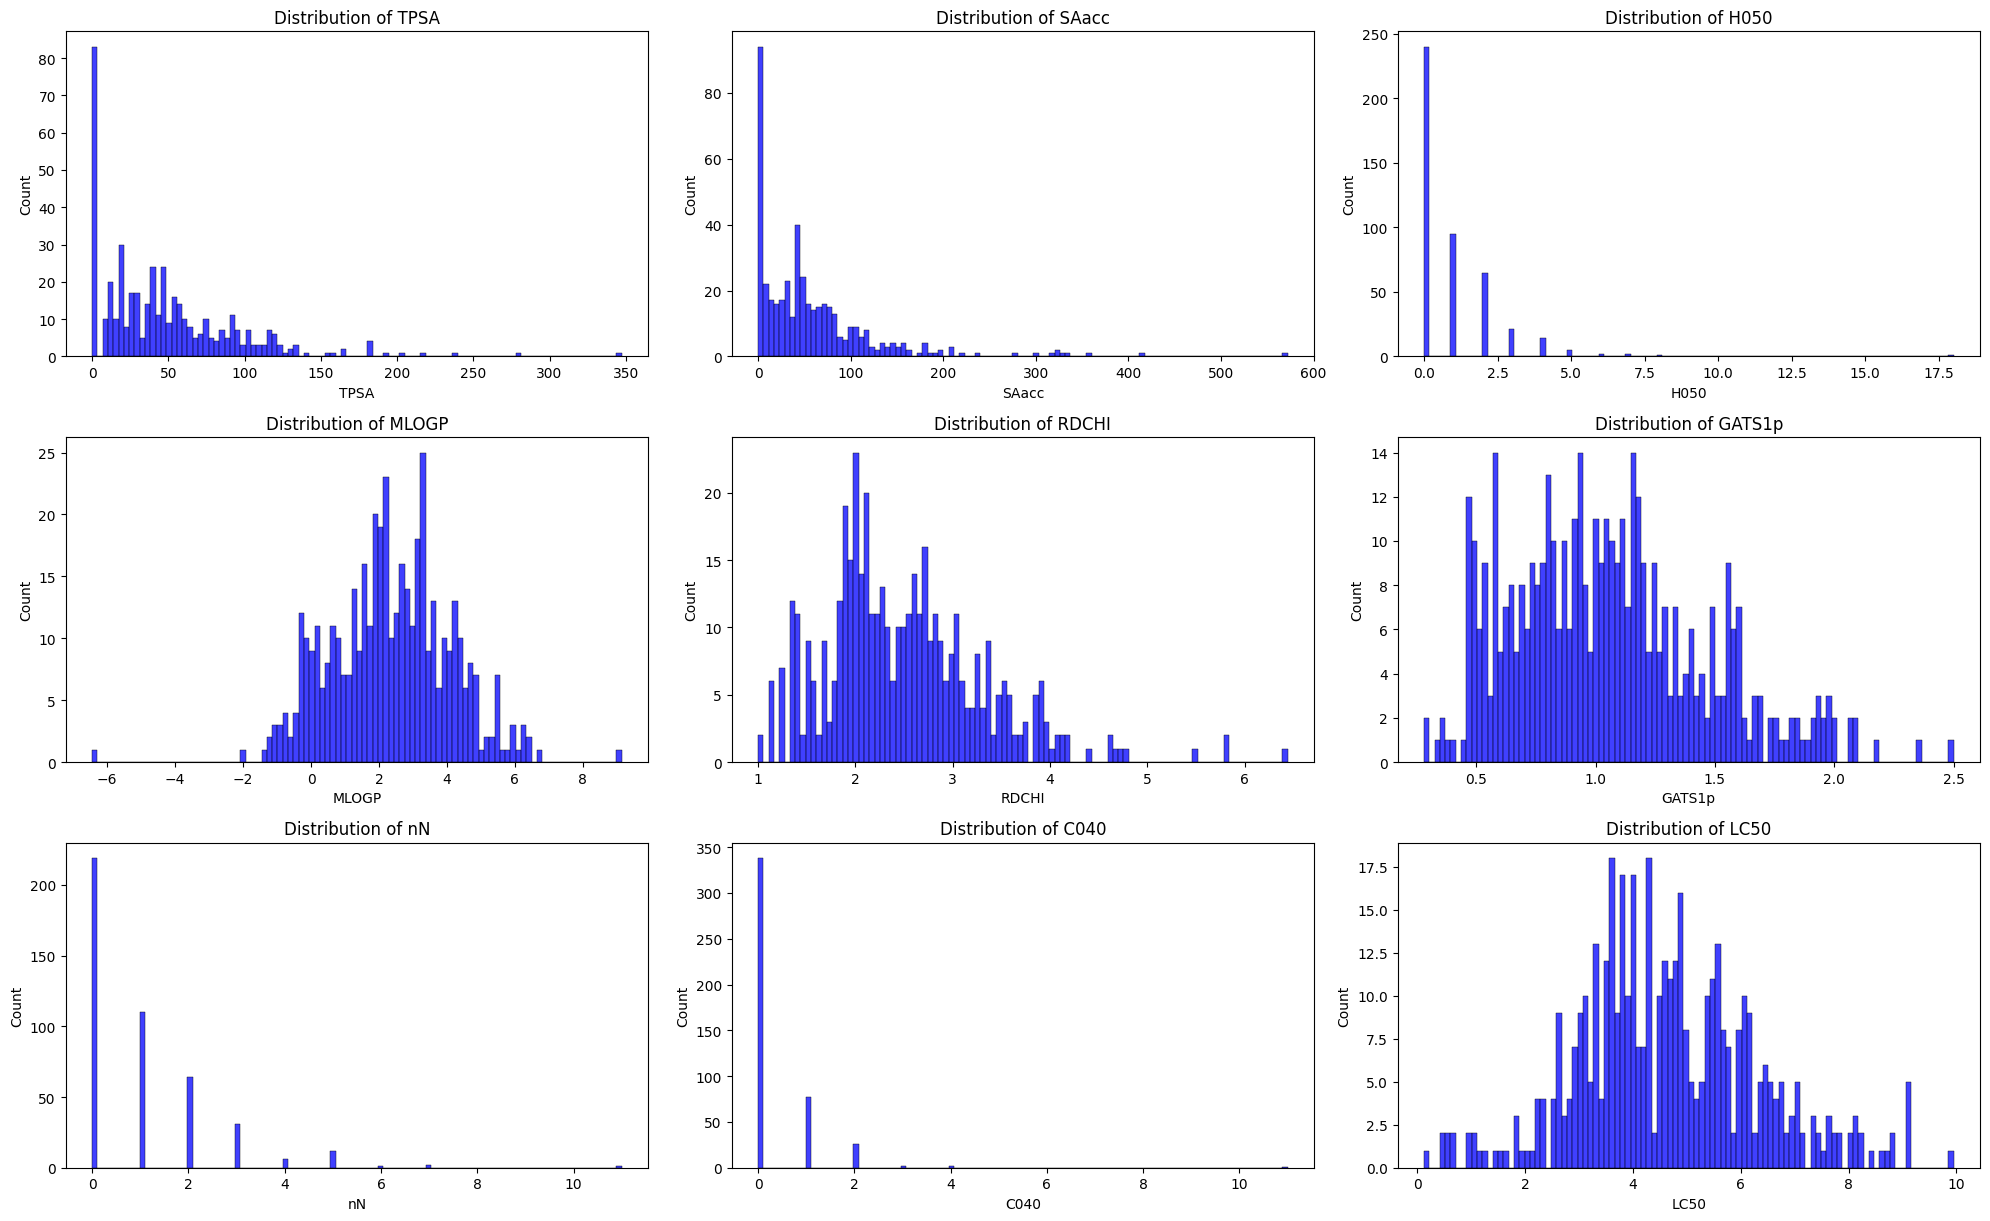

In [7]:
#plot all the distributions
plt.figure(figsize=(20, 20))
for i, col in enumerate(train.columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(train[col], color="b", bins=100)
    plt.title(f"Distribution of {col}")
plt.tight_layout()


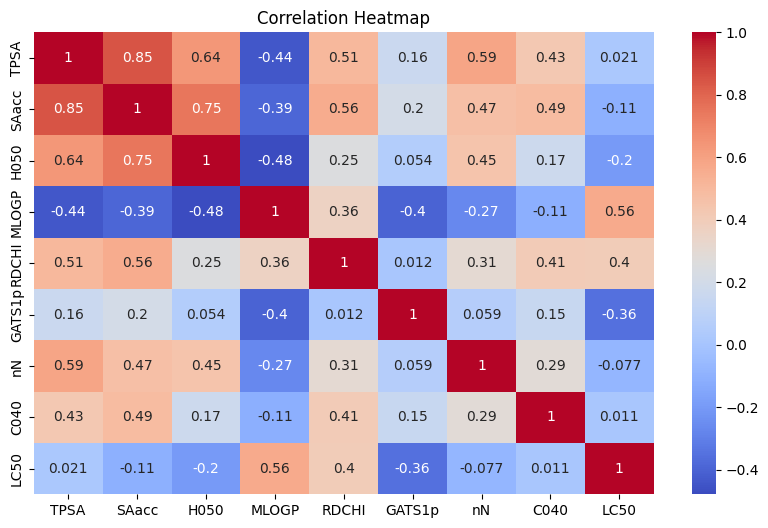

In [8]:
# create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


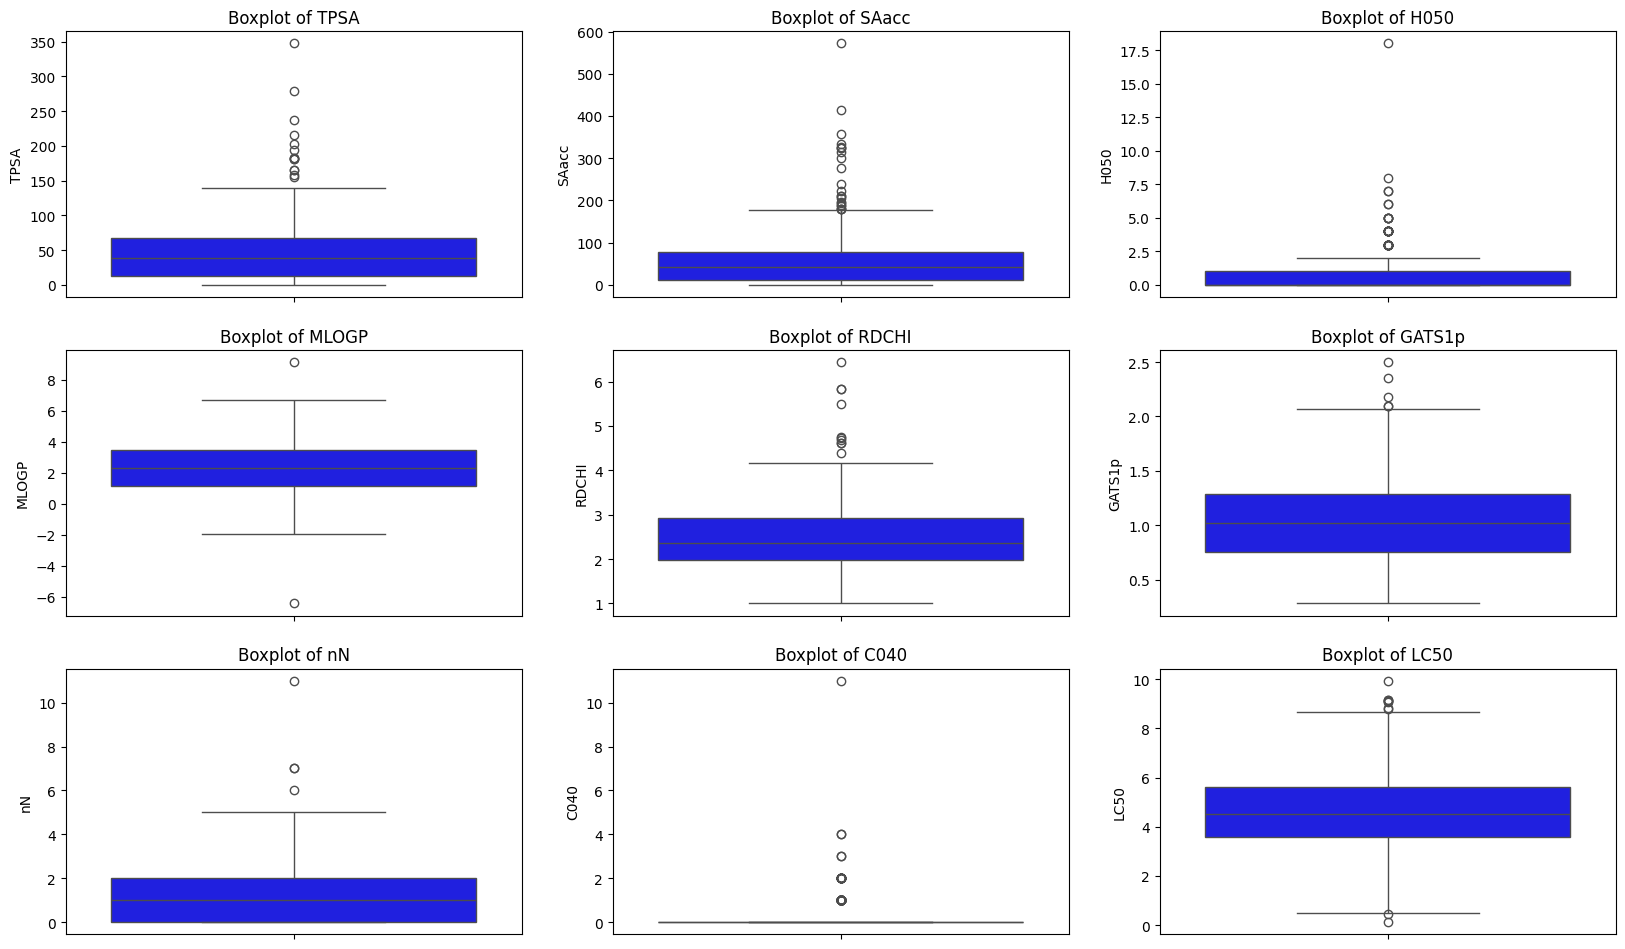

In [9]:
# boxplots
plt.figure(figsize=(20, 20))
for i, col in enumerate(train.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(y=train[col], color="b")
    plt.title(f"Boxplot of {col}")
    

Degree: 1, CV: 2
Cross Validation Scores: [-0.86886571 -0.84669122]
Mean CV Score: -0.8577784651260071
Std CV Score: 0.01108724057596655


Degree: 1, CV: 3
Cross Validation Scores: [-0.97415715 -0.79129723 -0.77051473]
Mean CV Score: -0.8453230334682997
Std CV Score: 0.09149371528273777


Degree: 1, CV: 4
Cross Validation Scores: [-0.92600716 -0.79886801 -0.92835119 -0.76495038]
Mean CV Score: -0.8545441837980903
Std CV Score: 0.07362288622305518


Degree: 1, CV: 5
Cross Validation Scores: [-0.73734179 -1.01423045 -1.00116614 -0.77462916 -0.89378026]
Mean CV Score: -0.8842295611767593
Std CV Score: 0.11336125990744265


Degree: 2, CV: 2
Cross Validation Scores: [-0.83167472 -0.84141299]
Mean CV Score: -0.8365438514728089
Std CV Score: 0.004869135323272489


Degree: 2, CV: 3
Cross Validation Scores: [-0.91346002 -0.74522805 -0.71886421]
Mean CV Score: -0.792517425383792
Std CV Score: 0.08619395074444658


Degree: 2, CV: 4
Cross Validation Scores: [-0.86388603 -0.74365259 -0.88454029 -0.

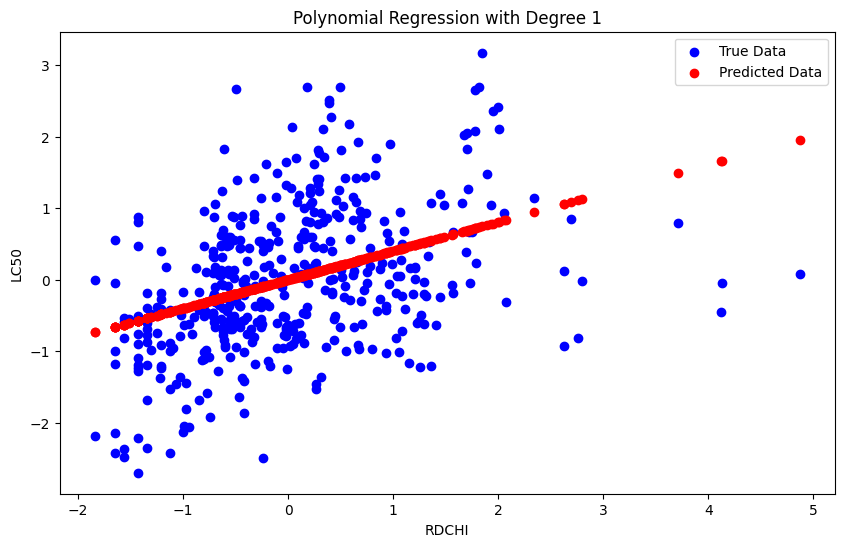

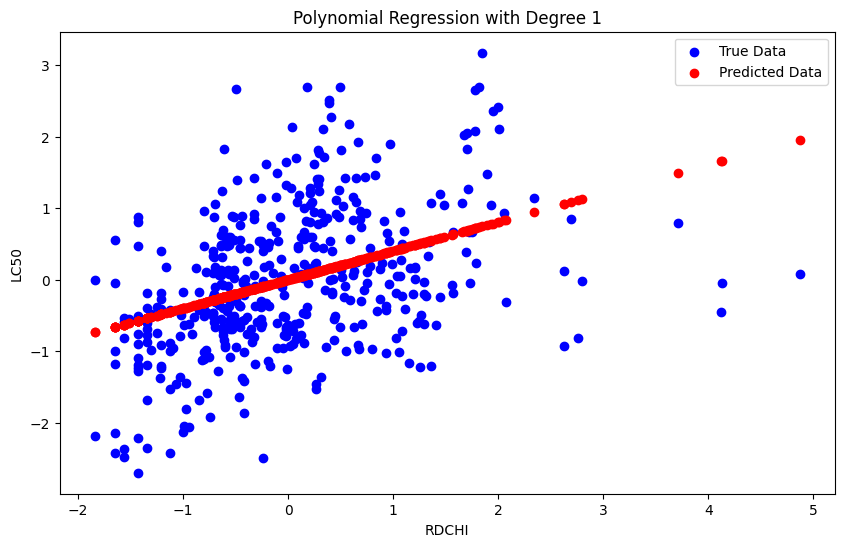

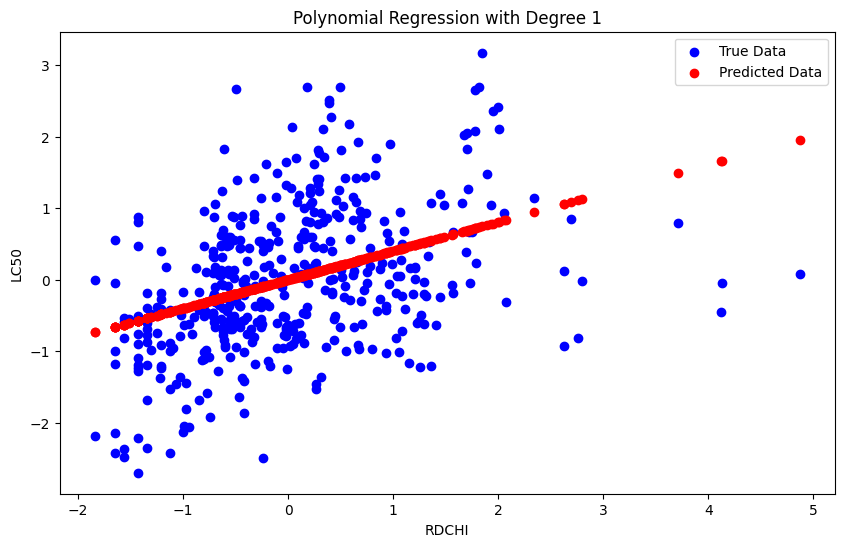

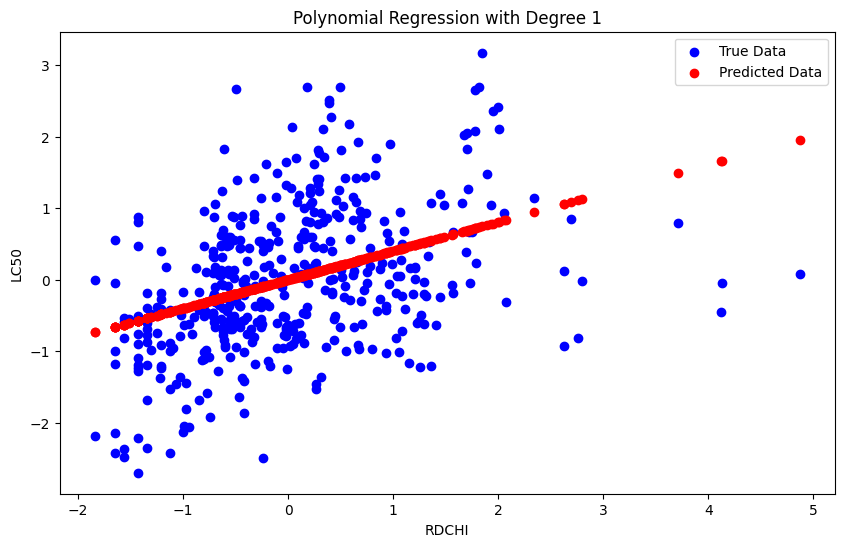

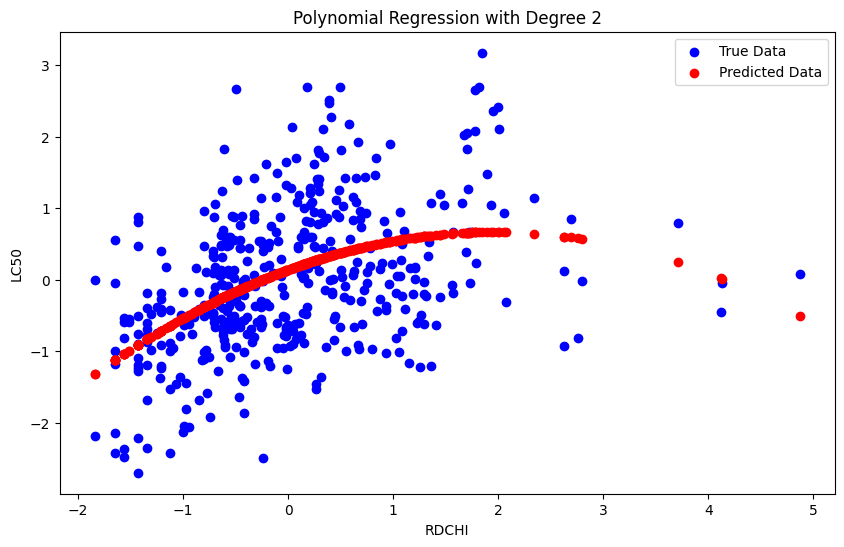

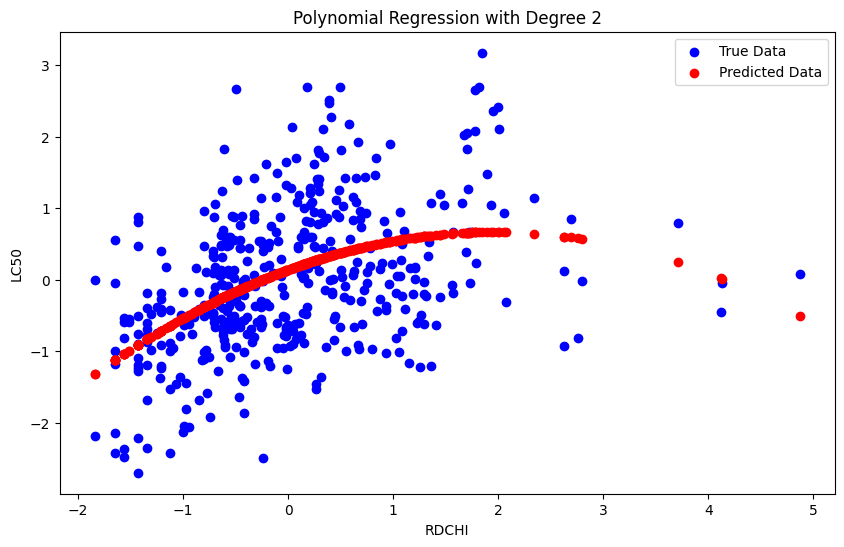

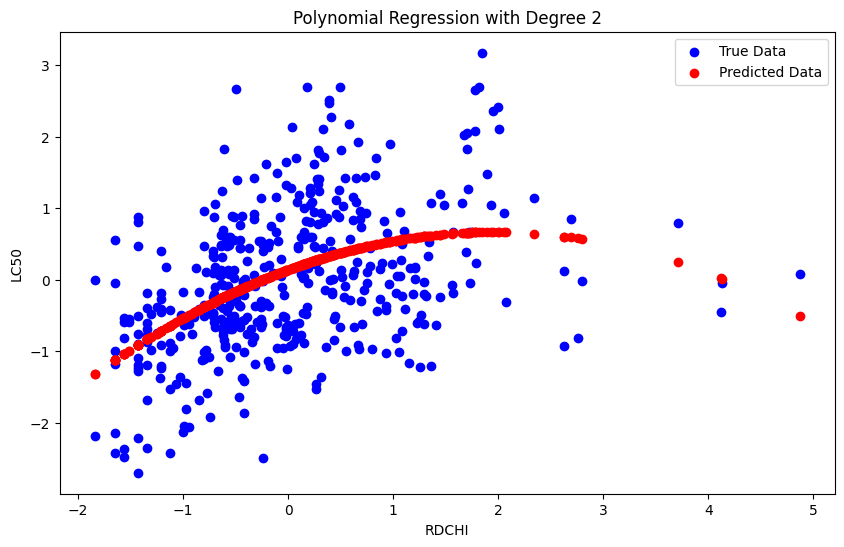

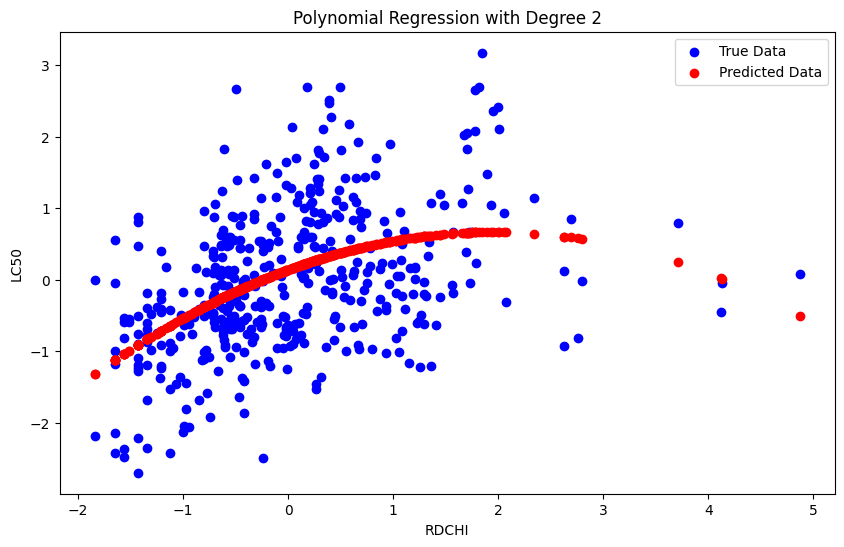

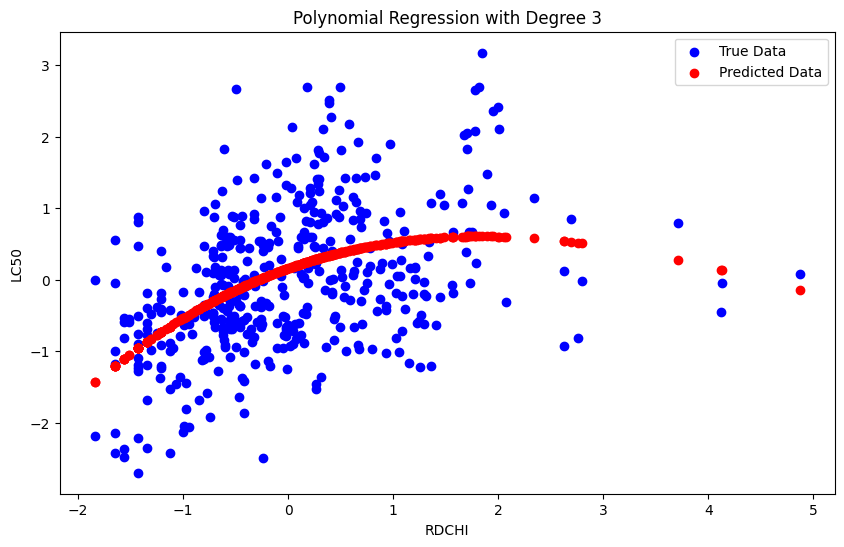

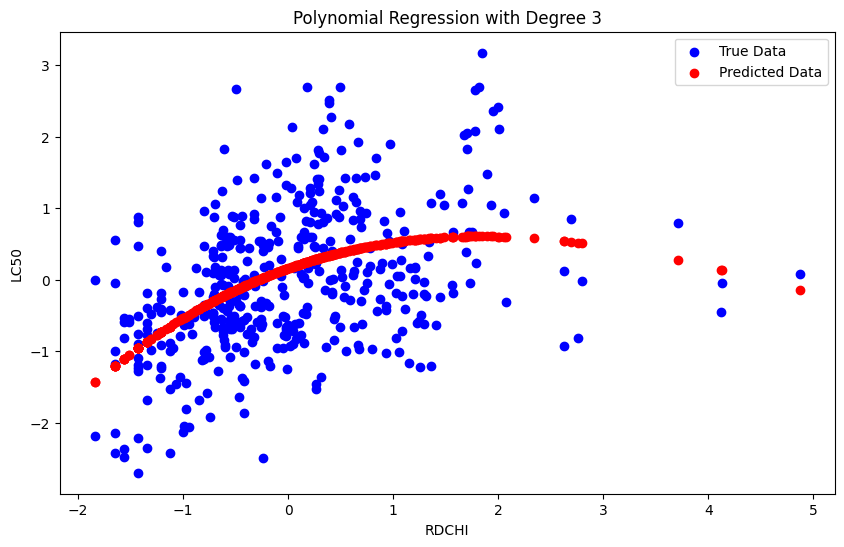

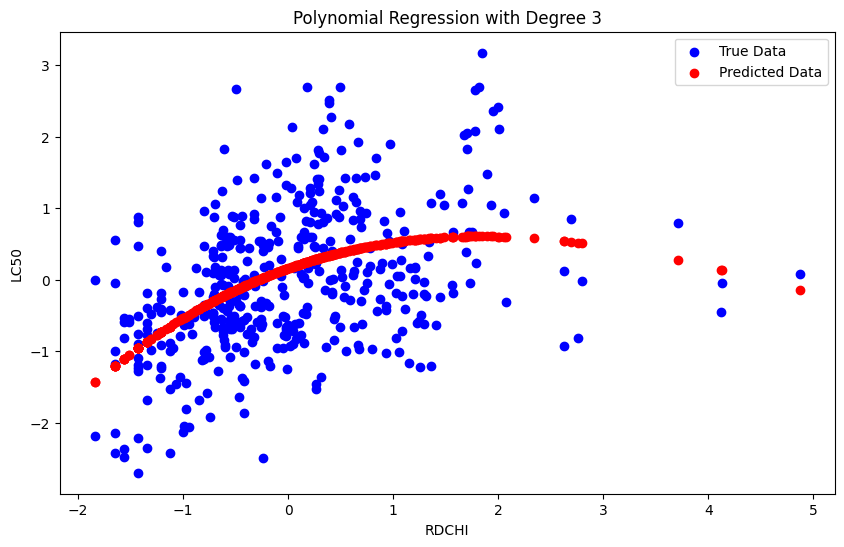

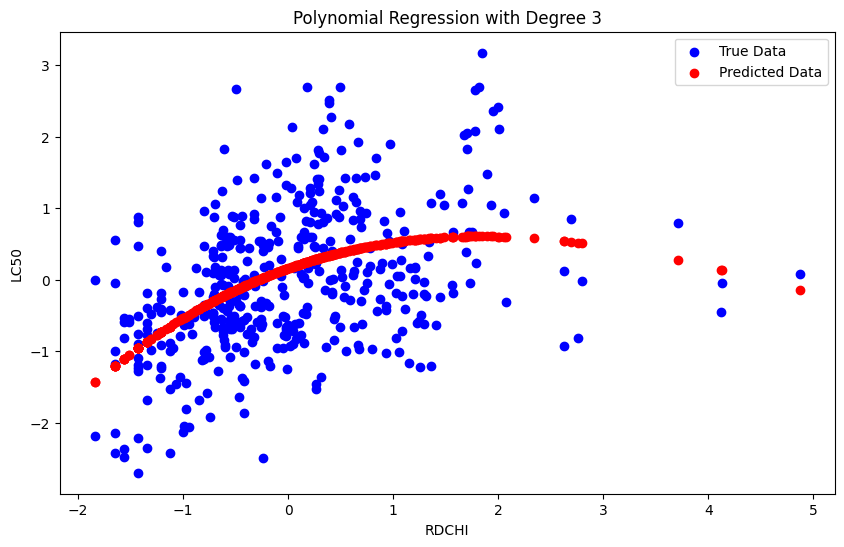

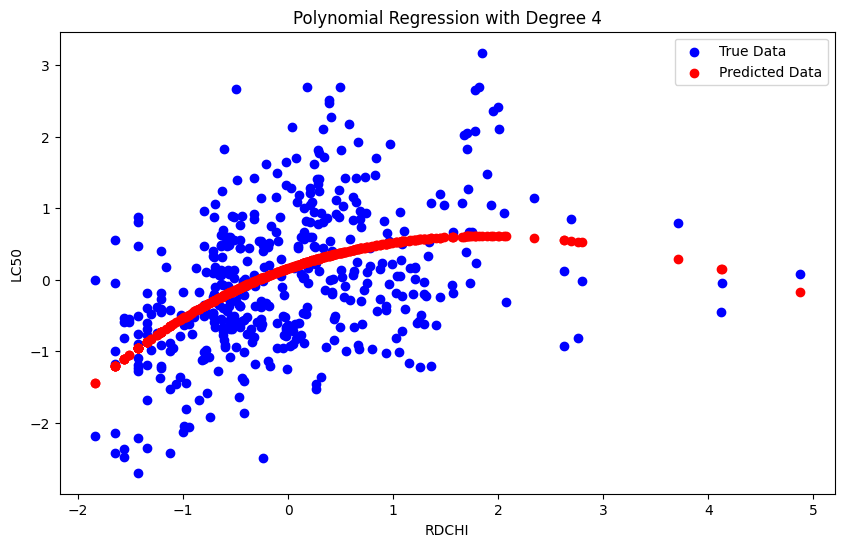

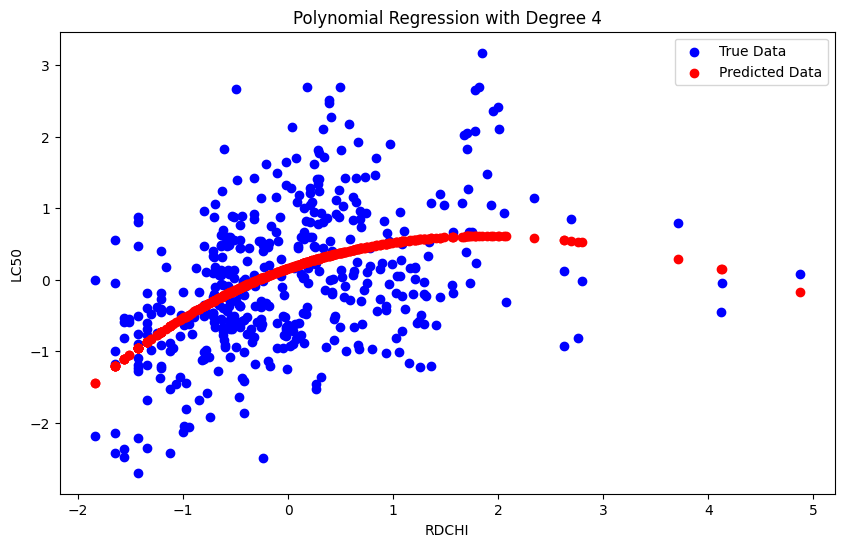

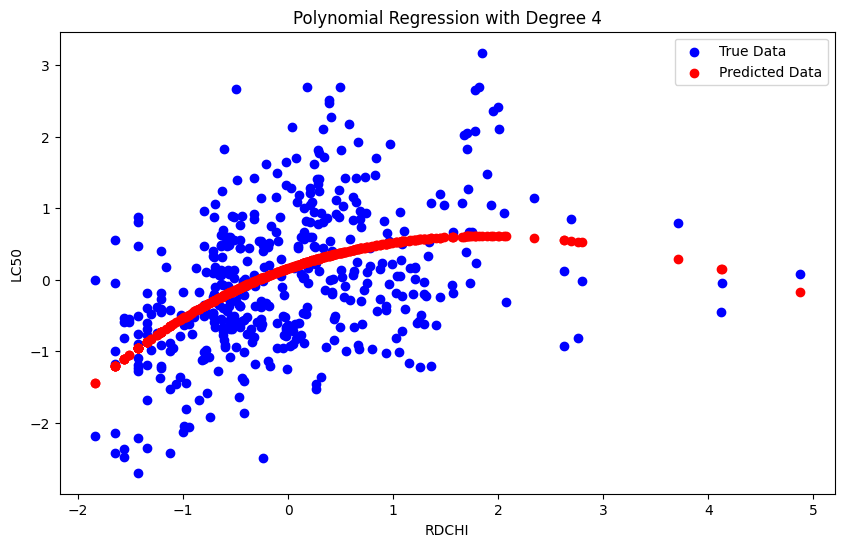

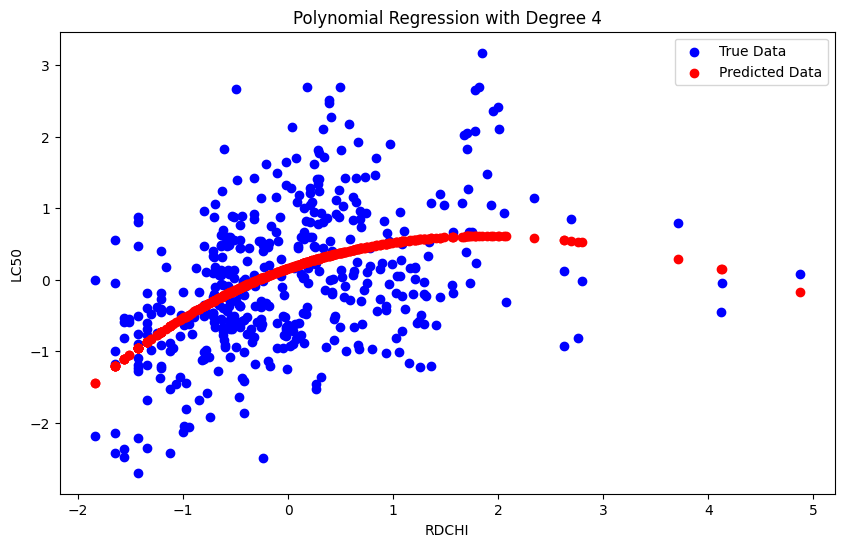

In [27]:
# Preprocess for Regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#cross_val_score
from sklearn.model_selection import cross_val_score

path = "toxicity_tAPP"
#read train and val
train = pd.read_csv(os.path.join(path, "toxicity_train.csv"))
val = pd.read_csv(os.path.join(path, "toxicity_validation.csv"))

def preprocess(train, val):
    # drop the ID column
    #train = train.drop("ID", axis=1)
    #val = val.drop("ID", axis=1)
    
    # drop the LC50 column
    X_train = train["RDCHI"]
    #change type to df
    X_train = X_train.to_frame()
    #scale X_train
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    # scale the data
    
    # target variable
    y_train = train["LC50"]
    #scale y_train
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train.to_frame())
        
    X_val = val["RDCHI"]
    
    
    #change type to df
    X_val = X_val.to_frame()
    X_val = scaler.transform(X_val)
    
    
    
    return X_train, X_val, y_train



# polynomial regression with using RDCHI
## Polynomial Regression Approach

# create a polynomial regression model with RDCHI
def poly_reg(X_train, y_train, X_val, degree, cv_n=5):
    # create a pipeline
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # cross validation
    cv = cross_val_score(model, X_train, y_train, cv=cv_n, scoring="neg_mean_squared_error")
    #print the results
    print(f"Cross Validation Scores: {cv}")
    print(f"Mean CV Score: {np.mean(cv)}")
    print(f"Std CV Score: {np.std(cv)}")
    
    
    # fit the model
    model.fit(X_train, y_train)
    
    # predict the target variable
    y_pred = model.predict(X_val)
    y_train_p = model.predict(X_train)
    
    
    return y_pred, model, y_train_p

X_train, X_val, y_train = preprocess(train, val)

# train for different degrees and cv_n's in a loop
for degree in range(1, 5):
    for cv_n in range(2, 6):
        print(f"Degree: {degree}, CV: {cv_n}")
        y_pred, model, y_train_p = poly_reg(X_train, y_train, X_val, degree, cv_n)
        
        print("\n")
        #plot the results
        plt.figure(figsize=(10, 6))
        plt.scatter(X_train, y_train, color="b", label="True Data")
        plt.scatter(X_train, y_train_p, color="r",  label="Predicted Data")
        plt.title(f"Polynomial Regression with Degree {degree}")
        plt.xlabel("RDCHI")
        plt.ylabel("LC50")
        plt.legend()
        
        
    
        


Degree: 1, CV: 2
Cross Validation Scores: [-0.74966719 -0.6335458 ]
Mean CV Score: -0.6916064906765516
Std CV Score: 0.058060695237379945


Degree: 1, CV: 3
Cross Validation Scores: [-0.98446162 -0.51166866 -0.63524782]
Mean CV Score: -0.7104593654763662
Std CV Score: 0.20020968563807104


Degree: 1, CV: 4
Cross Validation Scores: [-0.85545954 -0.63547025 -0.56683481 -0.70490118]
Mean CV Score: -0.6906664417685647
Std CV Score: 0.10693489431540039


Degree: 1, CV: 5
Cross Validation Scores: [-0.67694909 -1.08722718 -0.60964228 -0.36425935 -0.82231077]
Mean CV Score: -0.7120777343124173
Std CV Score: 0.23899501880827445


Degree: 2, CV: 2
Cross Validation Scores: [-0.79180582 -0.62904671]
Mean CV Score: -0.7104262688553529
Std CV Score: 0.0813795555334057


Degree: 2, CV: 3
Cross Validation Scores: [-1.06957512 -0.50180403 -0.62295937]
Mean CV Score: -0.7314461702867927
Std CV Score: 0.24415574771523993


Degree: 2, CV: 4
Cross Validation Scores: [-0.94249424 -0.62262485 -0.55535599 -0.

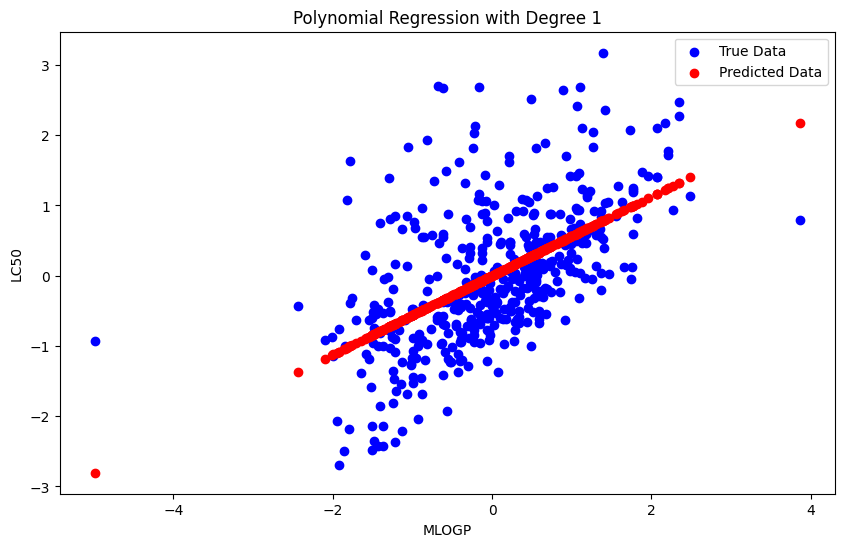

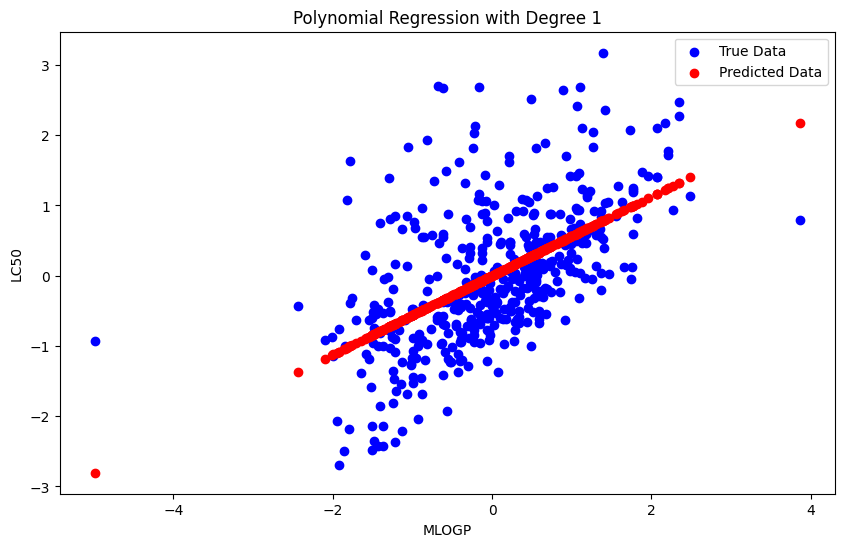

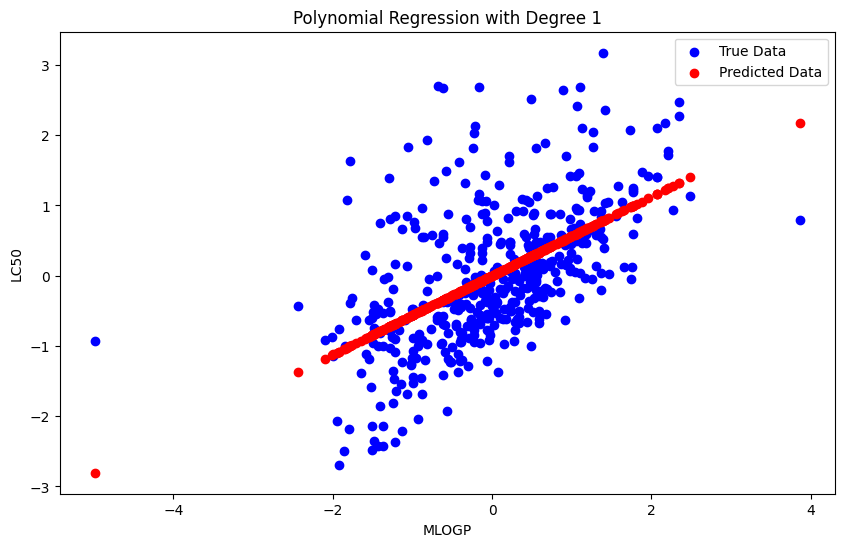

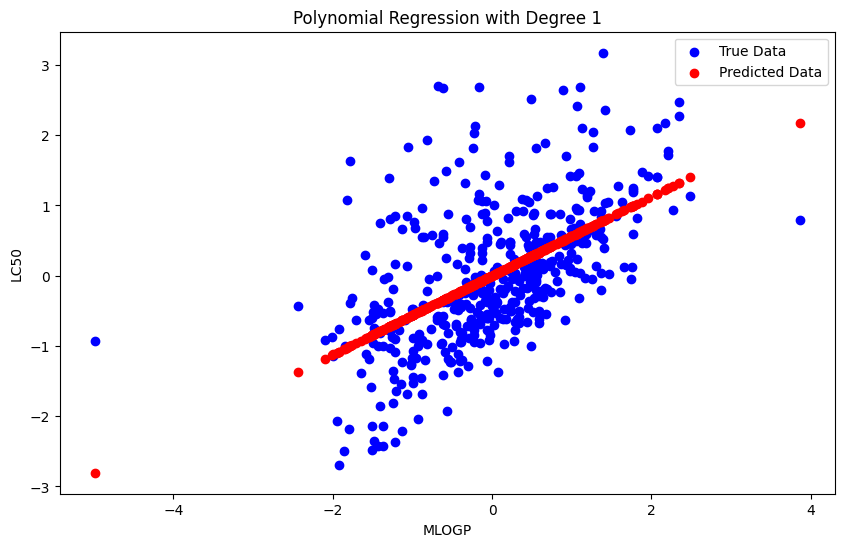

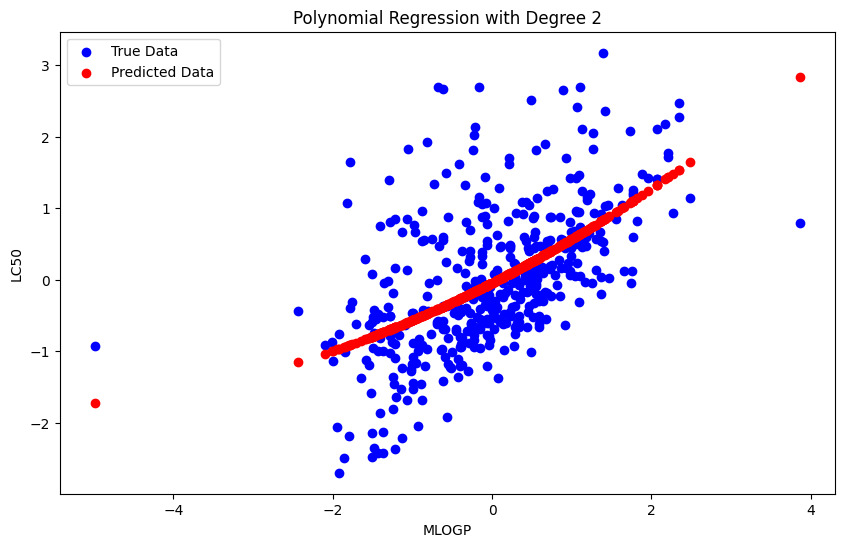

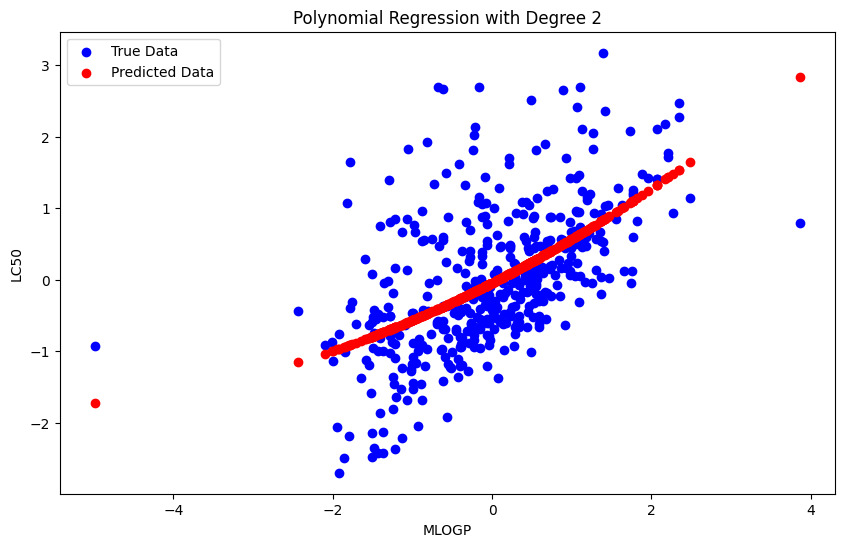

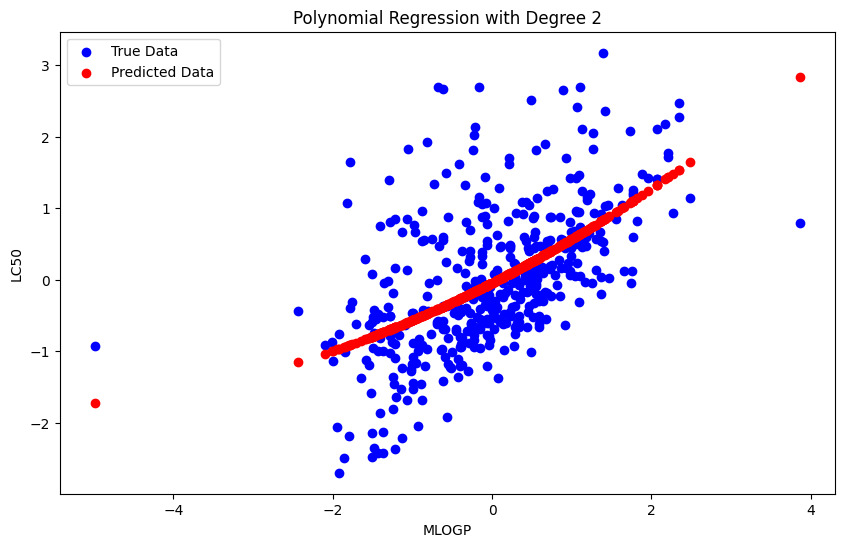

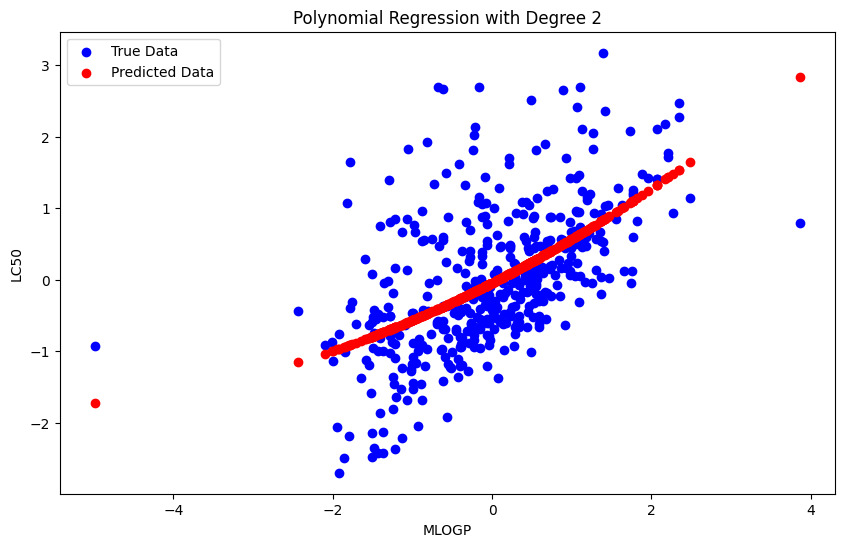

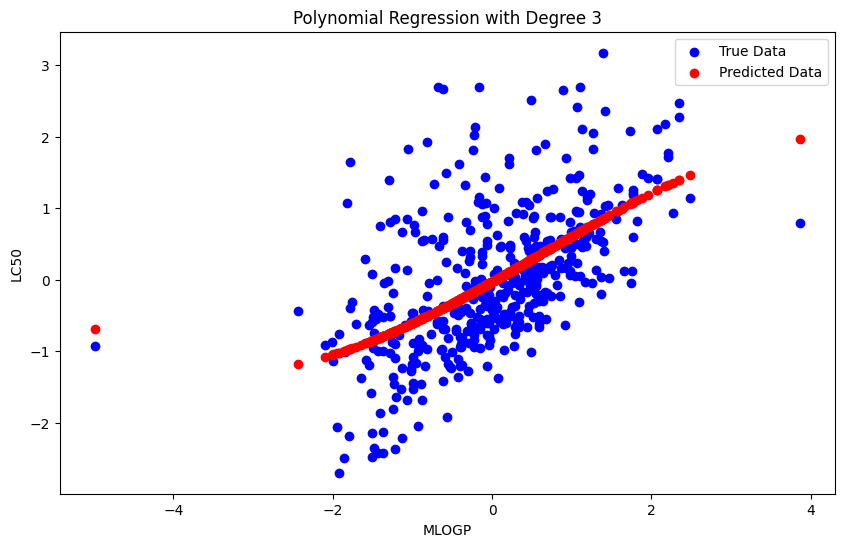

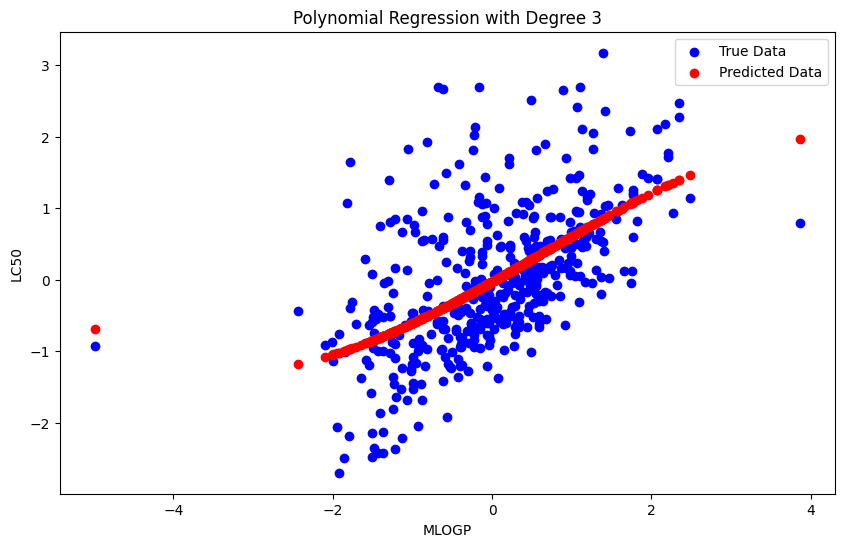

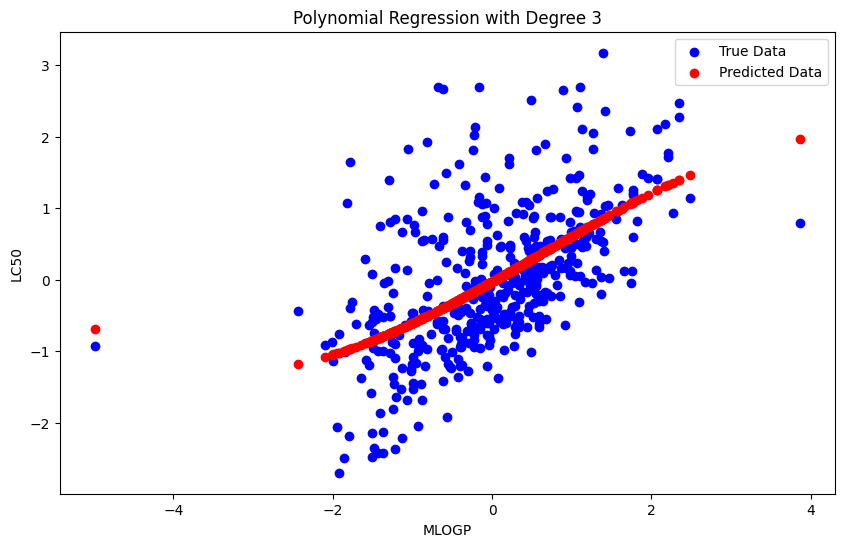

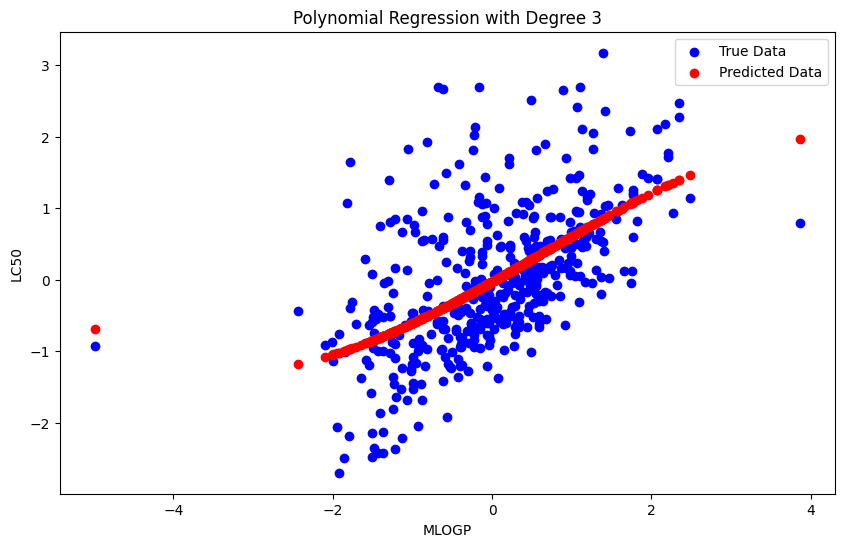

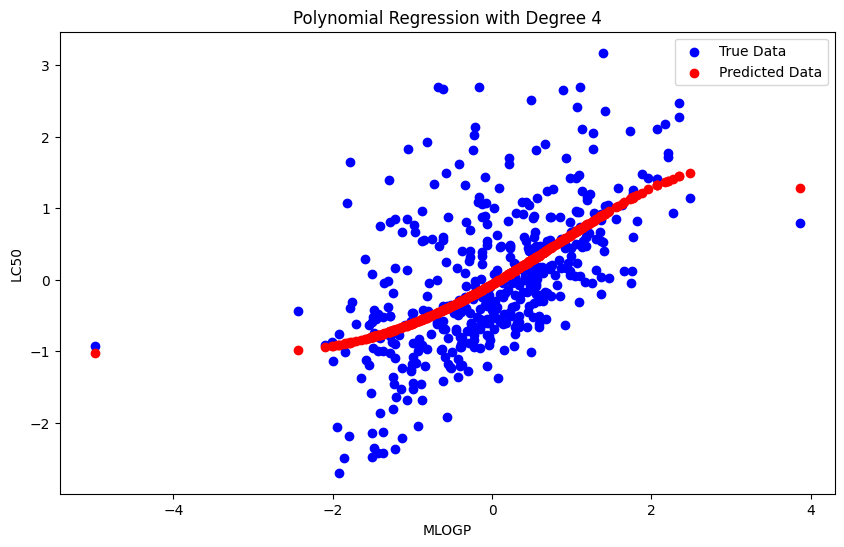

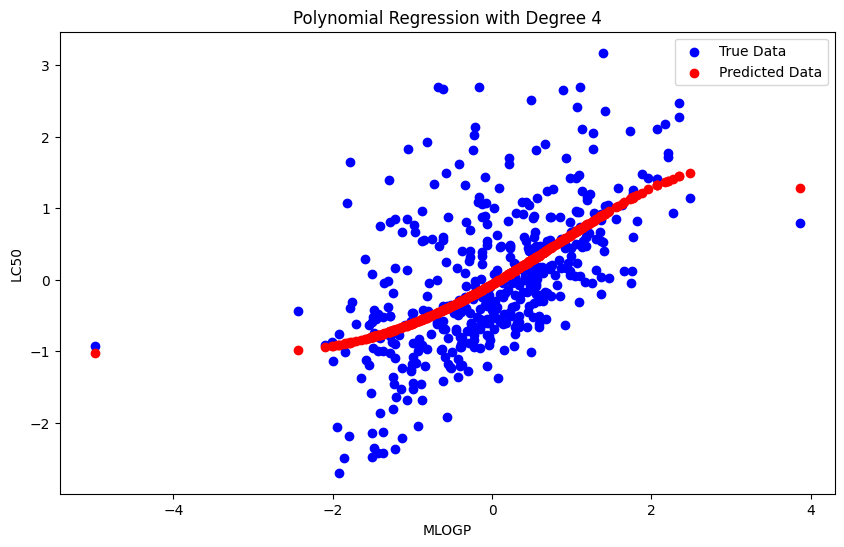

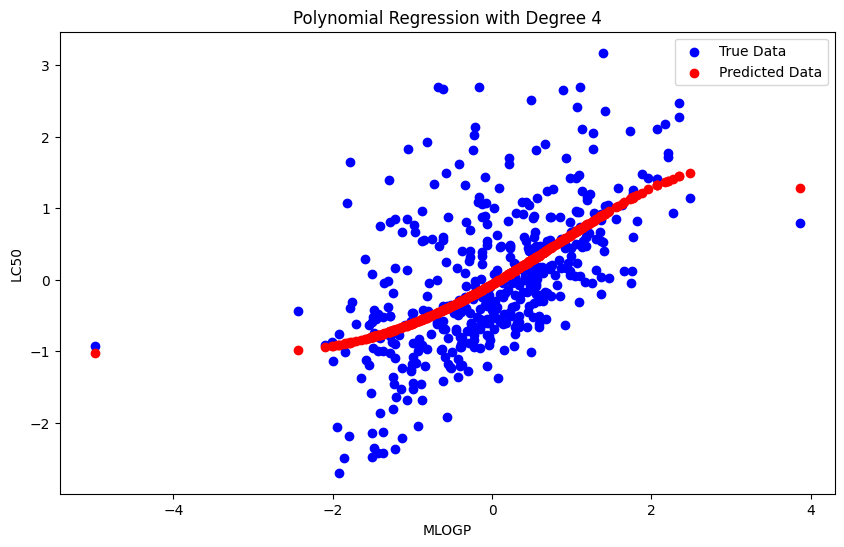

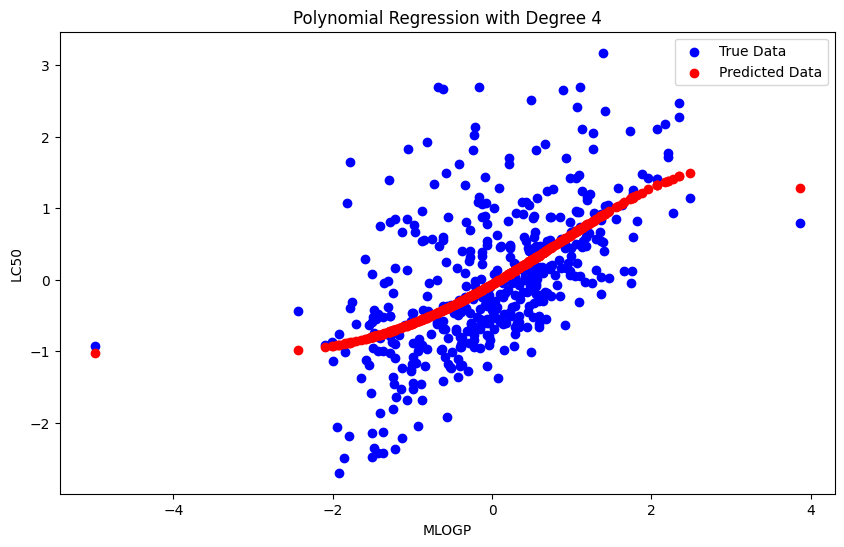

In [29]:
# Preprocess for Regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#cross_val_score
from sklearn.model_selection import cross_val_score

path = "toxicity_tAPP"
#read train and val
train = pd.read_csv(os.path.join(path, "toxicity_train.csv"))
val = pd.read_csv(os.path.join(path, "toxicity_validation.csv"))

def preprocess(train, val):
    # drop the ID column
    #train = train.drop("ID", axis=1)
    #val = val.drop("ID", axis=1)
    
    # drop the LC50 column
    X_train = train["MLOGP"]
    #change type to df
    X_train = X_train.to_frame()
    #scale X_train
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    # scale the data
    
    # target variable
    y_train = train["LC50"]
    #scale y_train
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train.to_frame())
        
    X_val = val["MLOGP"]
    
    
    #change type to df
    X_val = X_val.to_frame()
    X_val = scaler.transform(X_val)
    
    
    
    return X_train, X_val, y_train



# polynomial regression with using RDCHI
## Polynomial Regression Approach

# create a polynomial regression model with RDCHI
def poly_reg(X_train, y_train, X_val, degree, cv_n=5):
    # create a pipeline
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # cross validation
    cv = cross_val_score(model, X_train, y_train, cv=cv_n, scoring="neg_mean_squared_error")
    #print the results
    print(f"Cross Validation Scores: {cv}")
    print(f"Mean CV Score: {np.mean(cv)}")
    print(f"Std CV Score: {np.std(cv)}")
    
    
    # fit the model
    model.fit(X_train, y_train)
    
    # predict the target variable
    y_pred = model.predict(X_val)
    y_train_p = model.predict(X_train)
    
    
    return y_pred, model, y_train_p

X_train, X_val, y_train = preprocess(train, val)

# train for different degrees and cv_n's in a loop
for degree in range(1, 5):
    for cv_n in range(2, 6):
        print(f"Degree: {degree}, CV: {cv_n}")
        y_pred, model, y_train_p = poly_reg(X_train, y_train, X_val, degree, cv_n)
        
        print("\n")
        #plot the results
        plt.figure(figsize=(10, 6))
        plt.scatter(X_train, y_train, color="b", label="True Data")
        plt.scatter(X_train, y_train_p, color="r",  label="Predicted Data")
        plt.title(f"Polynomial Regression with Degree {degree}")
        plt.xlabel("MLOGP")
        plt.ylabel("LC50")
        plt.legend()
        


Degree: 1, CV: 5
Cross Validation Scores: [-0.73734179 -1.01423045 -1.00116614 -0.77462916 -0.89378026]
Mean CV Score: -0.8842295611767593
Std CV Score: 0.11336125990744265


Degree: 2, CV: 5
Cross Validation Scores: [-0.7077564  -0.94961818 -0.94570809 -0.68325269 -0.82834629]
Mean CV Score: -0.8229363306388482
Std CV Score: 0.11307377815233567


Degree: 3, CV: 5
Cross Validation Scores: [-0.70680621 -0.9507589  -0.97236427 -0.6866237  -0.82288798]
Mean CV Score: -0.8278882105568165
Std CV Score: 0.11883775068542862


Degree: 4, CV: 5
Cross Validation Scores: [-0.7082181  -0.9526336  -0.97531619 -0.68783904 -0.82435948]
Mean CV Score: -0.8296732808629642
Std CV Score: 0.11935463738650218




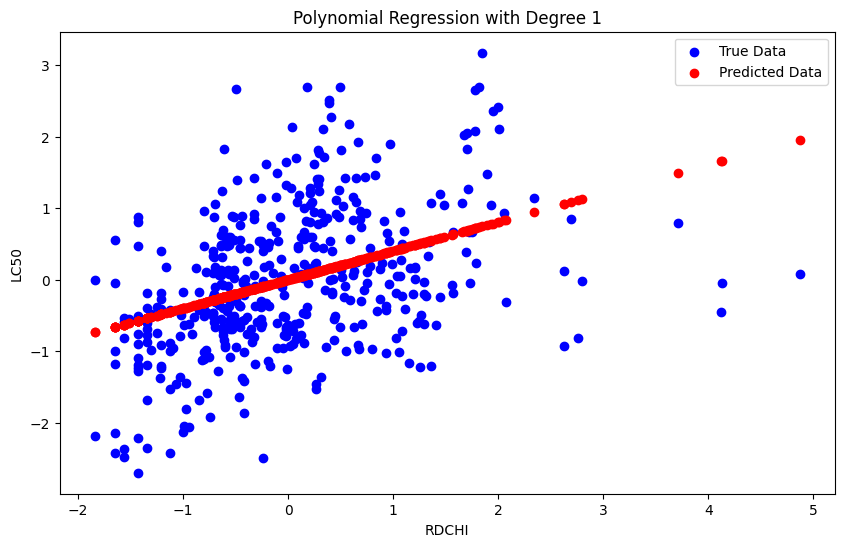

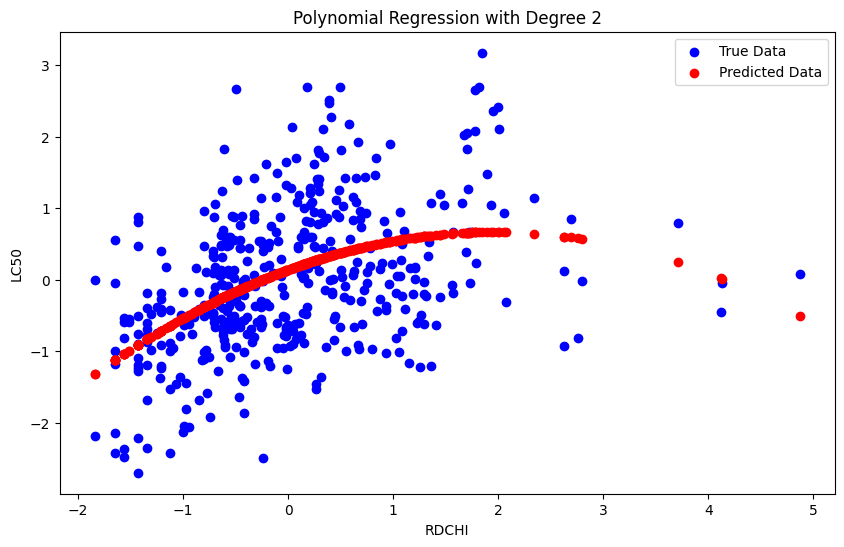

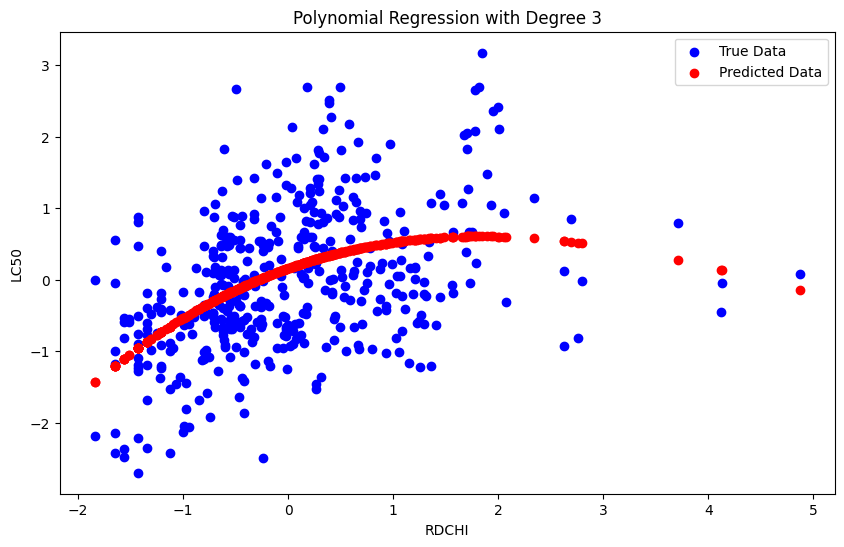

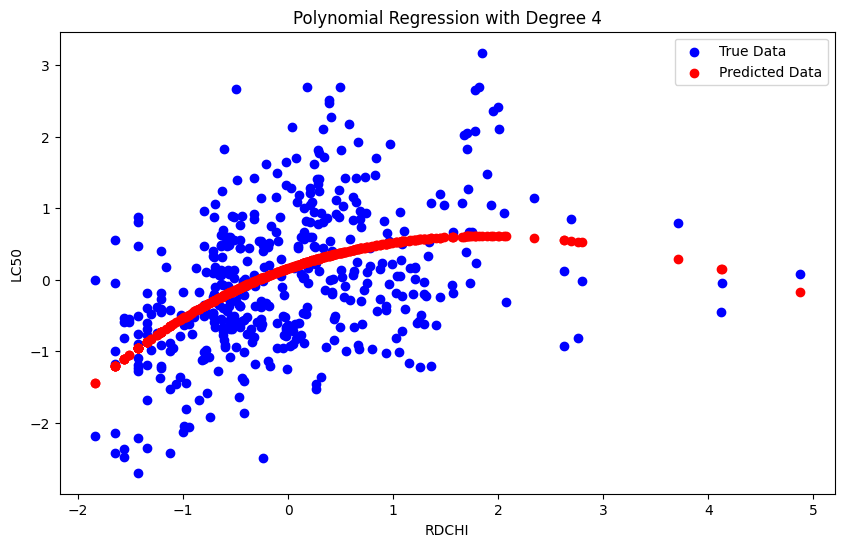

In [33]:
def preprocess(train, val):
    # drop the ID column
    #train = train.drop("ID", axis=1)
    #val = val.drop("ID", axis=1)
    
    # drop the LC50 column
    X_train = train["RDCHI"]
    #change type to df
    X_train = X_train.to_frame()
    #scale X_train
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    # scale the data
    
    # target variable
    y_train = train["LC50"]
    #scale y_train
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train.to_frame())
        
    X_val = val["RDCHI"]
    
    
    #change type to df
    X_val = X_val.to_frame()
    X_val = scaler.transform(X_val)
    
    
    
    return X_train, X_val, y_train



# polynomial regression with using RDCHI
## Polynomial Regression Approach

# create a polynomial regression model with RDCHI
def poly_reg(X_train, y_train, X_val, degree, cv_n=5):
    # create a pipeline
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # cross validation
    cv = cross_val_score(model, X_train, y_train, cv=cv_n, scoring="neg_mean_squared_error")
    #print the results
    print(f"Cross Validation Scores: {cv}")
    print(f"Mean CV Score: {np.mean(cv)}")
    print(f"Std CV Score: {np.std(cv)}")
    
    
    # fit the model
    model.fit(X_train, y_train)
    
    # predict the target variable
    y_pred = model.predict(X_val)
    y_train_p = model.predict(X_train)
    
    
    return y_pred, model, y_train_p

X_train, X_val, y_train = preprocess(train, val)
for degree in range(1, 5):

    print(f"Degree: {degree}, CV: {cv_n}")
    y_pred, model, y_train_p = poly_reg(X_train, y_train, X_val, degree, 5)

    print("\n")
    #plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color="b", label="True Data")
    plt.scatter(X_train, y_train_p, color="r",  label="Predicted Data")
    plt.title(f"Polynomial Regression with Degree {degree}")
    plt.xlabel("RDCHI")
    plt.ylabel("LC50")
    plt.legend()


Degree: 1, CV: 5
Cross Validation Scores: [-0.70746854 -0.95299815 -0.99278159 -0.6866508  -0.82649634]
Mean CV Score: -0.8332790853717971
Std CV Score: 0.12421582688581198


Degree: 2, CV: 5
Cross Validation Scores: [-0.70746854 -0.95299815 -0.99278159 -0.6866508  -0.82649634]
Mean CV Score: -0.8332790853717971
Std CV Score: 0.12421582688581198


Degree: 3, CV: 5
Cross Validation Scores: [-0.70746854 -0.95299815 -0.99278159 -0.6866508  -0.82649634]
Mean CV Score: -0.8332790853717971
Std CV Score: 0.12421582688581198


Degree: 4, CV: 5
Cross Validation Scores: [-0.70746854 -0.95299815 -0.99278159 -0.6866508  -0.82649634]
Mean CV Score: -0.8332790853717971
Std CV Score: 0.12421582688581198




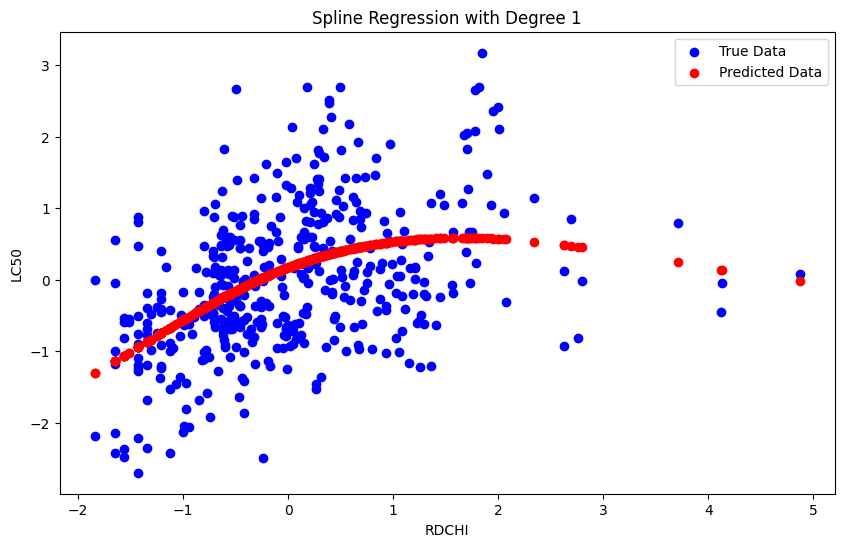

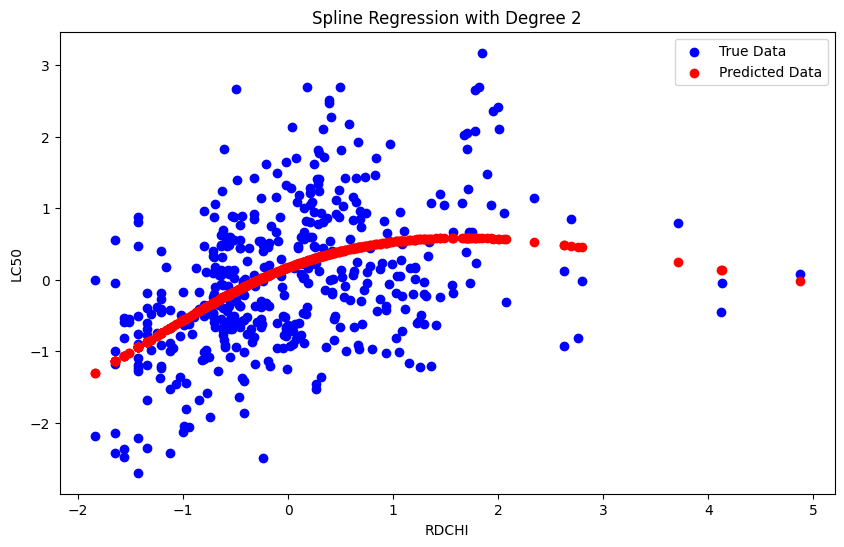

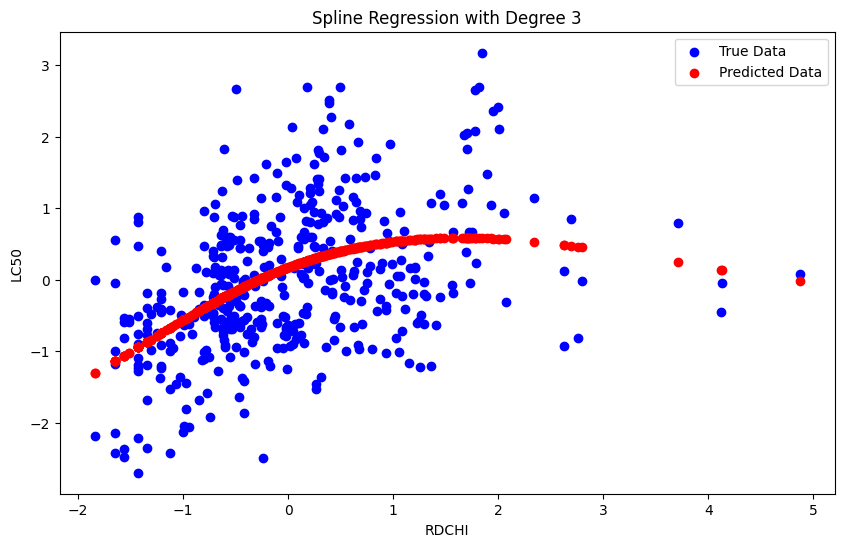

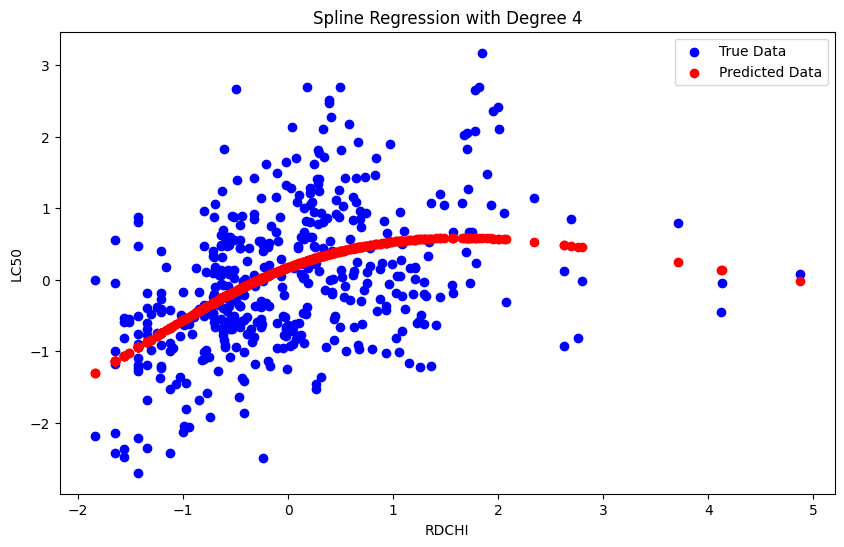

In [35]:
#Base spline Regression Using RDCHI
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

def spline_reg(X_train, y_train, X_val, degree, cv_n=5):
    # create a spline
    X_spline = dmatrix("bs(train, df=4)", {"train": X_train}, return_type="dataframe")
    
    
    
    
    # cross validation
    cv = cross_val_score(LinearRegression(), X_spline, y_train, cv=cv_n, scoring="neg_mean_squared_error")
    #print the results
    print(f"Cross Validation Scores: {cv}")
    print(f"Mean CV Score: {np.mean(cv)}")
    print(f"Std CV Score: {np.std(cv)}")
    
    # fit the model
    model = sm.OLS(y_train, X_spline).fit()
    
    # predict the target variable
    X_val_spline = dmatrix("bs(val, df=4)", {"val": X_val}, return_type="dataframe")
    y_pred = model.predict(X_val_spline)
    y_train_p = model.predict(X_spline)
    

    
    return y_pred, model, y_train_p

X_train, X_val, y_train = preprocess(train, val)
for degree in range(1, 5):

    print(f"Degree: {degree}, CV: {cv_n}")
    y_pred, model, y_train_p = spline_reg(X_train, y_train, X_val, degree, 5)

    print("\n")
    #plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color="b", label="True Data")
    plt.scatter(X_train, y_train_p, color="r",  label="Predicted Data")
    plt.title(f"Spline Regression with Degree {degree}")
    plt.xlabel("RDCHI")
    plt.ylabel("LC50")
    plt.legend()
    

Degree: 1, CV: 5, Spline Type: Cubic
Cross Validation Scores: [-0.73564766 -0.99422815 -0.95245096 -0.69118462 -0.8360725 ]
Mean CV Score: -0.841916779084959
Std CV Score: 0.11786774114647398
Knot Positions: [-0.63722531 -0.15505381  0.540457  ]




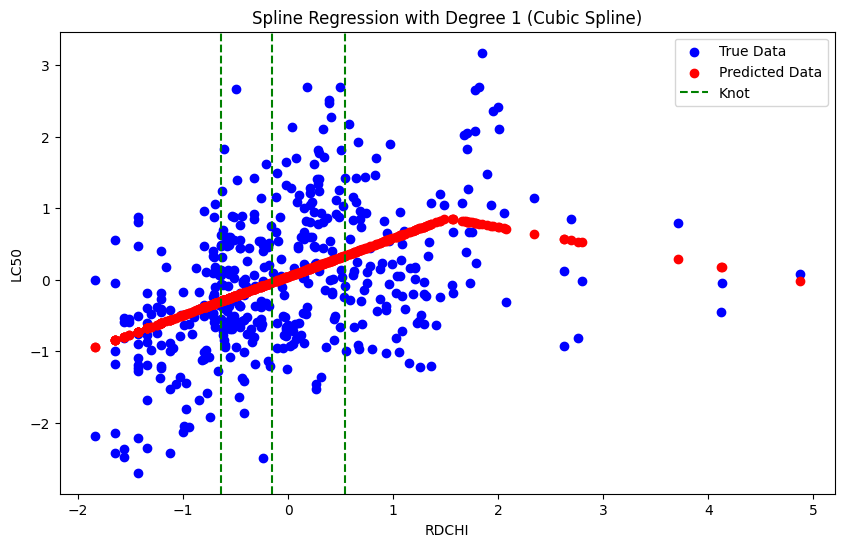

Degree: 2, CV: 5, Spline Type: Cubic
Cross Validation Scores: [-0.70710137 -0.958026   -0.98008057 -0.68601321 -0.82678341]
Mean CV Score: -0.8316009130019637
Std CV Score: 0.12226907400339847
Knot Positions: [-0.63722531 -0.15505381  0.540457  ]




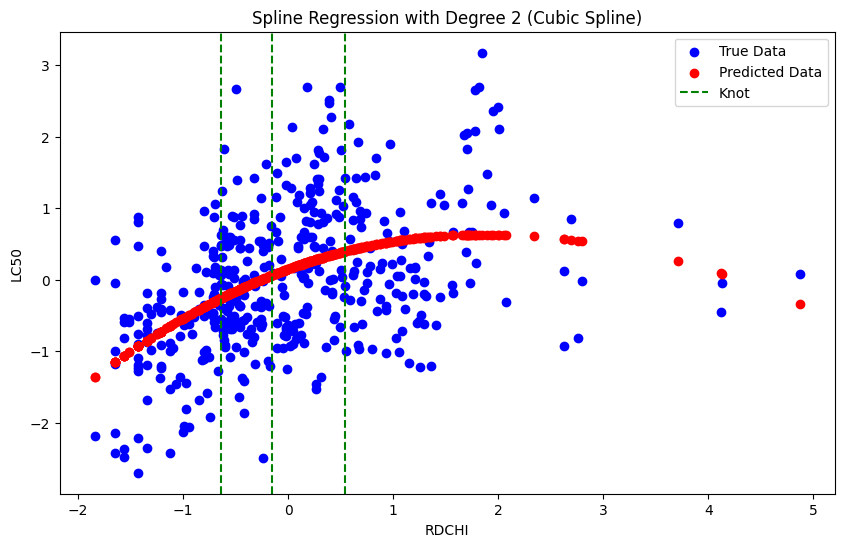

Degree: 3, CV: 5, Spline Type: Cubic
Cross Validation Scores: [-0.70814474 -0.95266835 -0.97196165 -0.6895617  -0.8407046 ]
Mean CV Score: -0.8326082060868962
Std CV Score: 0.11819714708713826
Knot Positions: [-0.63722531 -0.15505381  0.540457  ]




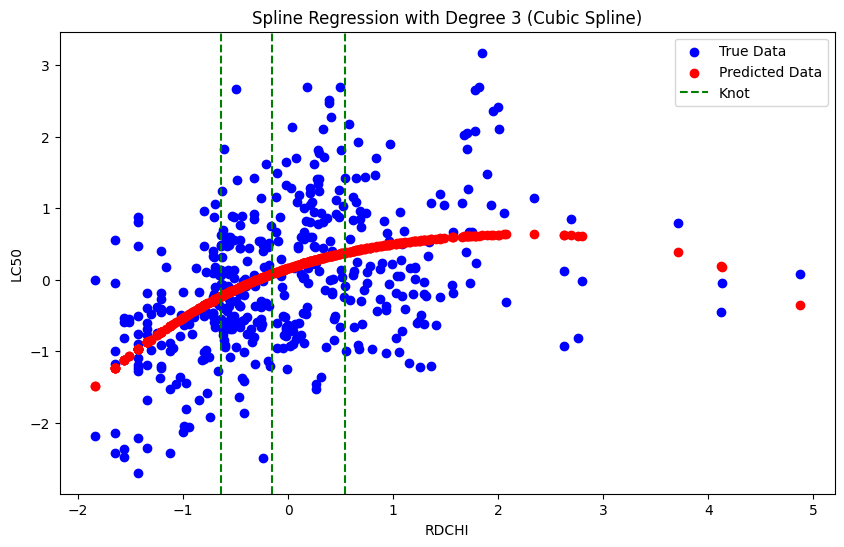

Degree: 4, CV: 5, Spline Type: Cubic
Cross Validation Scores: [-0.73191043 -0.95848646 -0.99710263 -0.69496584 -0.95576007]
Mean CV Score: -0.8676450837670556
Std CV Score: 0.12729311165179696
Knot Positions: [-0.63722531 -0.15505381  0.540457  ]




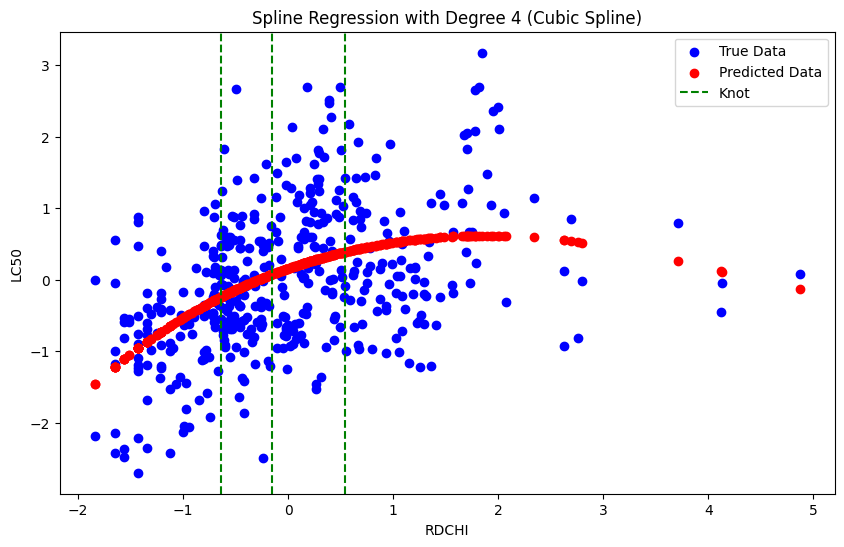

In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Function to preprocess the data (Example function, user needs to define it)

train = pd.read_csv(os.path.join(path, "toxicity_train.csv"))
val = pd.read_csv(os.path.join(path, "toxicity_validation.csv"))
def preprocess(train, val):
    # drop the ID column
    #train = train.drop("ID", axis=1)
    #val = val.drop("ID", axis=1)
    
    # drop the LC50 column
    X_train = train["RDCHI"]
    #change type to df
    X_train = X_train.to_frame()
    #scale X_train
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    # scale the data
    
    # target variable
    y_train = train["LC50"]
    #scale y_train
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train.to_frame())
        
    X_val = val["RDCHI"]
    
    
    #change type to df
    X_val = X_val.to_frame()
    X_val = scaler.transform(X_val)
    
    
    
    return X_train, X_val, y_train

knot_positions = np.percentile(X_train.flatten(), np.linspace(0, 100, 1 + 2)[1:-1])
# Function to perform spline regression
def spline_reg(X_train, y_train, X_val, degree, cv_n=5, n_knots=3):
    # Create a spline transformer for the training data
    spline_transformer = SplineTransformer(degree=degree, n_knots=n_knots, include_bias=False)
    X_spline = spline_transformer.fit_transform(X_train)
    
    # Perform cross-validation
    model = LinearRegression()
    cv_scores = cross_val_score(model, X_spline, y_train, cv=cv_n, scoring="neg_mean_squared_error")
    
    # Print cross-validation results
    print(f"Cross Validation Scores: {cv_scores}")
    print(f"Mean CV Score: {np.mean(cv_scores)}")
    print(f"Std CV Score: {np.std(cv_scores)}")
    
    # Fit the model on the full training data
    model.fit(X_spline, y_train)
    
    # Create spline basis for the validation data
    X_val_spline = spline_transformer.transform(X_val)
    
    # Predict on the validation data
    y_pred = model.predict(X_val_spline)
    y_train_pred = model.predict(X_spline)
    
    # Calculate knot positions
    knot_positions = np.percentile(X_train.flatten(), np.linspace(0, 100, n_knots + 2)[1:-1])
    print(f"Knot Positions: {knot_positions}")

    return y_pred, model, y_train_pred, knot_positions

# Example usage with preprocessing and plotting
def main(train, val, spline_type='cubic'):
    X_train, X_val, y_train = preprocess(train, val)
    for degree in range(1, 5):
        print(f"Degree: {degree}, CV: 5, Spline Type: {spline_type.capitalize()}")
        y_pred, model, y_train_pred, knot_positions = spline_reg(X_train, y_train, X_val, degree, 5)
        print("\n")
        
        # Plotting the results
        plt.figure(figsize=(10, 6))
        plt.scatter(X_train, y_train, color="b", label="True Data")
        plt.scatter(X_train, y_train_pred, color="r", label="Predicted Data")
        for i, knot in enumerate(knot_positions):
            plt.axvline(x=knot, color='g', linestyle='--', label='Knot' if i == 0 else "")
        plt.title(f"Spline Regression with Degree {degree} ({spline_type.capitalize()} Spline)")
        plt.xlabel("RDCHI")
        plt.ylabel("LC50")
        plt.legend()
        plt.show()

# Assuming train and val are your training and validation datasets

# Example call to main function with cubic splines
main(train, val, spline_type='cubic')

In [47]:
knot_positions = [-0.5,2.0]

446

Degree: 1, CV: 5, Spline Type: Cubic
Cross Validation Scores: [-0.70217121 -0.949921   -0.99273108 -0.6980002  -0.83771707]
Mean CV Score: -0.8361081120357934
Std CV Score: 0.12206523457797995




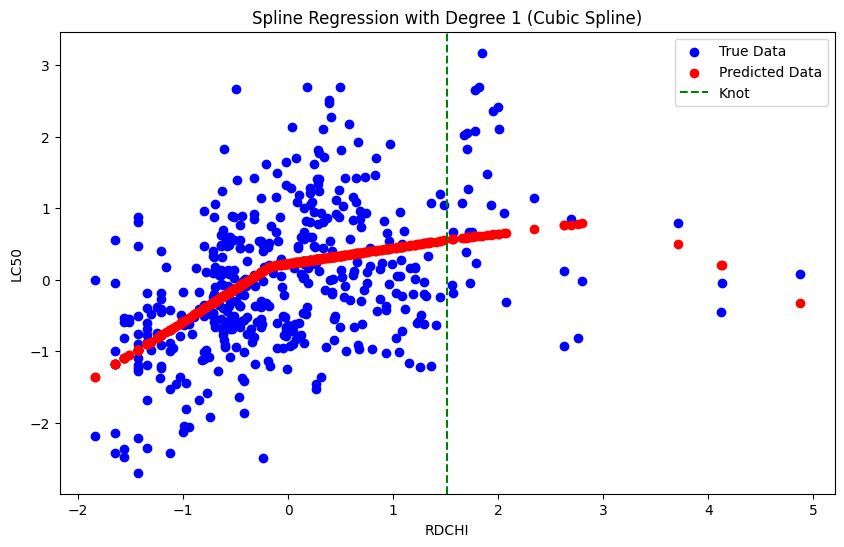

Degree: 2, CV: 5, Spline Type: Cubic
Cross Validation Scores: [-0.76727495 -0.95778604 -0.97712008 -0.67639829 -0.81551532]
Mean CV Score: -0.8388189354066025
Std CV Score: 0.11429999437393465




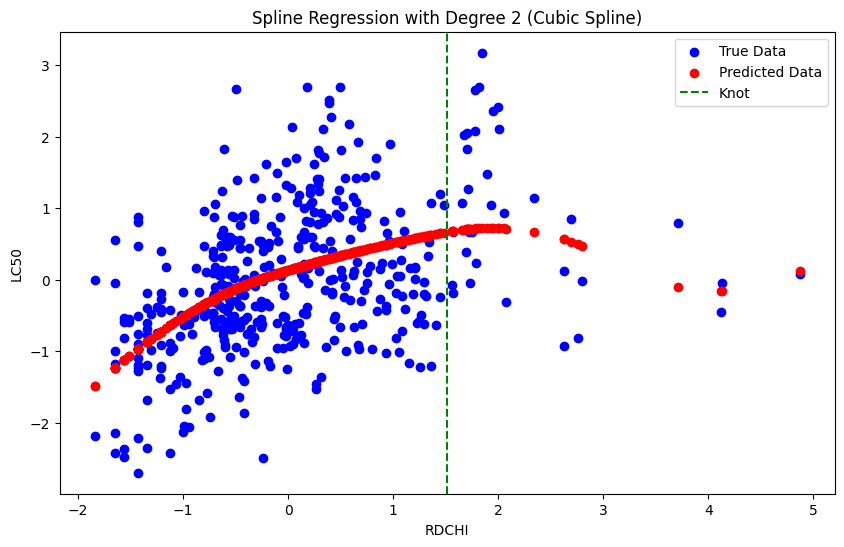

Degree: 3, CV: 5, Spline Type: Cubic
Cross Validation Scores: [-0.71029245 -0.94173409 -0.99579664 -0.6861552  -1.22871204]
Mean CV Score: -0.9125380840659224
Std CV Score: 0.19995143138242616




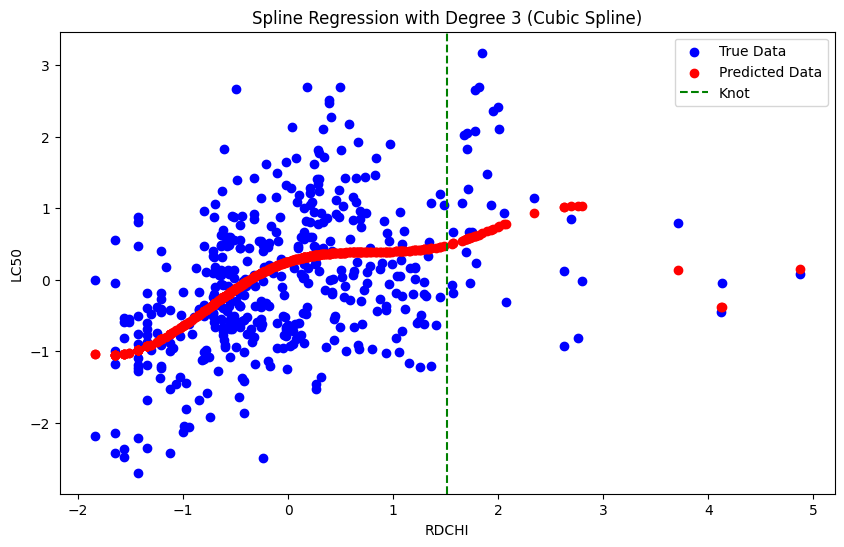

Degree: 4, CV: 5, Spline Type: Cubic
Cross Validation Scores: [-0.78329475 -0.93684455 -0.98791882 -0.67804137 -3.08927374]
Mean CV Score: -1.2950746456683977
Std CV Score: 0.9038221758399521




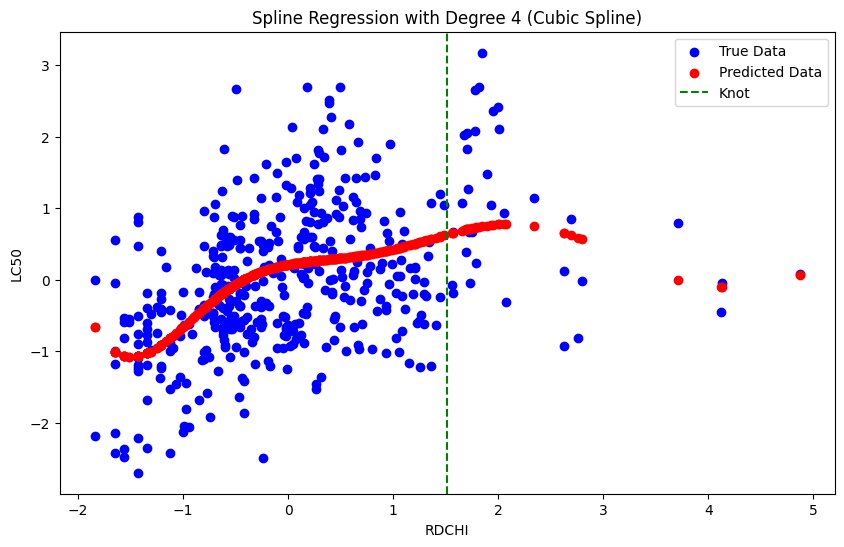

In [64]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Function to preprocess the data (Example function, user needs to define it)

train = pd.read_csv(os.path.join(path, "toxicity_train.csv"))
val = pd.read_csv(os.path.join(path, "toxicity_validation.csv"))
def preprocess(train, val):
    # drop the ID column
    #train = train.drop("ID", axis=1)
    #val = val.drop("ID", axis=1)
    
    # drop the LC50 column
    X_train = train["RDCHI"]
    #change type to df
    X_train = X_train.to_frame()
    #scale X_train
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    # scale the data
    
    # target variable
    y_train = train["LC50"]
    #scale y_train
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train.to_frame())
        
    X_val = val["RDCHI"]
    
    
    #change type to df
    X_val = X_val.to_frame()
    X_val = scaler.transform(X_val)
    
    
    
    return X_train, X_val, y_train

knot_positions = np.percentile(X_train.flatten(), np.linspace(0, 100, 1 + 2)[1:-1])
# Function to perform spline regression
def spline_reg(X_train, y_train, X_val, degree, cv_n=5, n_knots=2):
    # Create a spline transformer for the training data
    #knot_positions = np.array([-0.63722531,0.9, 1.9]).reshape(-1, 1) 
    #print(f"Knot Positions: {knot_positions}")
    
    spline_transformer = SplineTransformer(degree=degree, knots='uniform', include_bias=False)
    X_spline = spline_transformer.fit_transform(X_train)
    
    # Perform cross-validation
    model = LinearRegression()
    cv_scores = cross_val_score(model, X_spline, y_train, cv=cv_n, scoring="neg_mean_squared_error")
    
    # Print cross-validation results
    print(f"Cross Validation Scores: {cv_scores}")
    print(f"Mean CV Score: {np.mean(cv_scores)}")
    print(f"Std CV Score: {np.std(cv_scores)}")
    
    # Fit the model on the full training data
    model.fit(X_spline, y_train)
    
    # Create spline basis for the validation data
    X_val_spline = spline_transformer.transform(X_val)
    
    # Predict on the validation data
    y_pred = model.predict(X_val_spline)
    y_train_pred = model.predict(X_spline)
    
    # Calculate knot positions for uniform option
    knot_positions = np.linspace(X_train.min(), X_train.max(), n_knots + 2)[1:-1]
    
    
    


    return y_pred, model, y_train_pred, knot_positions

# Example usage with preprocessing and plotting
def main(train, val, spline_type='cubic'):
    X_train, X_val, y_train = preprocess(train, val)
    for degree in range(1, 5):
        print(f"Degree: {degree}, CV: 5, Spline Type: {spline_type.capitalize()}")
        y_pred, model, y_train_pred, knot_positions = spline_reg(X_train, y_train, X_val, degree, 5)
        print("\n")
        
        # Plotting the results
        plt.figure(figsize=(10, 6))
        plt.scatter(X_train, y_train, color="b", label="True Data")
        plt.scatter(X_train, y_train_pred, color="r", label="Predicted Data")
        for i, knot in enumerate(knot_positions):
            plt.axvline(x=knot, color='g', linestyle='--', label='Knot' if i == 0 else "")
        plt.title(f"Spline Regression with Degree {degree} ({spline_type.capitalize()} Spline)")
        plt.xlabel("RDCHI")
        plt.ylabel("LC50")
        plt.legend()
        plt.show()

# Assuming train and val are your training and validation datasets

# Example call to main function with cubic splines
main(train, val, spline_type='cubic')